#📌 Extracão

Importando os dados da API da Telecom X, no formato JSON, para um DataFrame do Pandas.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

df = pd.read_json(url)

df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [2]:
df

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

#🔧 Transformação

Normalizando o DataFrame para desaninhar as colunas

In [3]:
aninhadas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (dict, list))).any()]

for col in aninhadas:

    normalizado = pd.json_normalize(df[col])

    normalizado.columns = [f"{col}.{subcol}" for subcol in normalizado.columns]

    df = pd.concat([df.drop(columns=[col]), normalizado], axis=1)

df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [4]:
df

customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
0                     No                      DSL  ...                   Yes   
1                    Yes                      DSL  ...                    No   
2                     No              Fiber optic  ...                    No   
3                     No              Fiber optic  ...                   Yes   
4                     No              Fiber optic  ...                    No   
...                  ...                      ...  ...                   ...   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                    

Inspecionando o DataFrame sem os dados aninhados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Checando consistência dos dados e eliminando registros sem informação de Churn

In [6]:
df.isna().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [7]:
df['customerID'].duplicated().any()

np.False_

In [8]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [9]:
df[~df['Churn'].isin(['Yes', 'No'])]

customerID Churn customer.gender  customer.SeniorCitizen  \
30    0047-ZHDTW                Female                       0   
75    0120-YZLQA                  Male                       0   
96    0154-QYHJU                  Male                       0   
98    0162-RZGMZ                Female                       1   
175   0274-VVQOQ                  Male                       1   
...          ...   ...             ...                     ...   
7158  9840-GSRFX                Female                       0   
7180  9872-RZQQB                Female                       0   
7211  9920-GNDMB                  Male                       0   
7239  9955-RVWSC                Female                       0   
7247  9966-VYRTZ                Female                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
30                 No                  No               11                Yes   
75                 No                  No               71                Yes   
96                 No                  No               29                Yes   
98                 No                  No                5                Yes   
175               Yes                  No               65                Yes   
...               ...                 ...              ...                ...   
7158               No                  No               14                Yes   
7180              Yes                  No               49                 No   
7211               No                  No                9                Yes   
7239              Yes                 Yes               67                Yes   
7247              Yes                 Yes               31                Yes   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
30                   Yes              Fiber optic  ...                    No   
75                    No                       No  ...   No internet service   
96                    No                      DSL  ...                   Yes   
98                    No                      DSL  ...                   Yes   
175                  Yes              Fiber optic  ...                   Yes   
...                  ...                      ...  ...                   ...   
7158                 Yes                      DSL  ...                   Yes   
7180    No phone service                      DSL  ...                    No   
7211                 Yes              Fiber optic  ...                    No   
7239                  No                       No  ...   No internet service   
7247                  No                       No  ...   No internet service   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
30                          No                   No                   No   
75         No internet service  No internet service  No internet service   
96                          No                  Yes                   No   
98                          No                  Yes                   No   
175                        Yes                   No                  Yes   
...                        ...                  ...                  ...   
7158                        No                   No                   No   
7180                        No                   No                  Yes   
7211                        No                   No                   No   
7239       No internet service  No internet service  No internet service   
7247       No internet service  No internet service  No internet service   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
30                         No   Month-to-month                      Yes   
75        No internet service         Two year                      Yes   
96                         No         One year                      Yes   
98                         No   Month-to-month                    

Removendo linhas sem o valor Churn

In [10]:
df = df[df['Churn'].str.strip() != '']

In [11]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df[~df['Churn'].isin(['Yes', 'No'])]

Empty DataFrame
Columns: [customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, phone.PhoneService, phone.MultipleLines, internet.InternetService, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies, account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly, account.Charges.Total]
Index: []

[0 rows x 21 columns]

Checando valores das colunas

In [13]:
df.select_dtypes(include='object').apply(lambda col: col.unique())

customerID                   [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...
Churn                                                                [No, Yes]
customer.gender                                                 [Female, Male]
customer.Partner                                                     [Yes, No]
customer.Dependents                                                  [Yes, No]
phone.PhoneService                                                   [Yes, No]
phone.MultipleLines                                [No, Yes, No phone service]
internet.InternetService                                [DSL, Fiber optic, No]
internet.OnlineSecurity                         [No, Yes, No internet service]
internet.OnlineBackup                           [Yes, No, No internet service]
internet.DeviceProtection                       [No, Yes, No internet service]
internet.TechSupport                            [Yes, No, No internet service]
internet.StreamingTV                            [Yes, No, No internet service]
internet.StreamingMovies                        [No, Yes, No internet service]
account.Contract                          [One year, Month-to-month, Two year]
account.PaperlessBilling                                             [Yes, No]
account.PaymentMethod        [Mailed check, Electronic check, Credit card (...
account.Charges.Total        [593.3, 542.4, 280.85, 1237.85, 267.4, 571.45,...
dtype: object

Alterando DataType do campo account.Charges.Total

In [14]:
import numpy as np
df.loc[:, 'account.Charges.Total'] = df['account.Charges.Total'].replace(r'^\s*$', np.nan, regex=True)
df.loc[:, 'account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)
df = df.infer_objects(copy=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [16]:
df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                 593.30  
1          Mailed check                    59.9                 542.40  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

Verificar valores ausentes

In [17]:
print("\n>>> Valores ausentes por coluna:")
print(df.isnull().sum())


>>> Valores ausentes por coluna:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


Removendo linhas com account.Charges.Total ausentes

In [18]:
df = df[df['account.Charges.Total'].notnull()]

In [19]:
print("\n>>> Valores ausentes por coluna:")
print(df.isnull().sum())


>>> Valores ausentes por coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [20]:
df

customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
0                     No                      DSL  ...                   Yes   
1                    Yes                      DSL  ...                    No   
2                     No              Fiber optic  ...                    No   
3                     No              Fiber optic  ...                   Yes   
4                     No              Fiber optic  ...                    No   
...                  ...                      ...  ...                   ...   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                    

Alterando os nomes das colunas

In [21]:
df = df.rename(columns={
    'customerID': 'CodigoCliente',
    'Churn': 'Evasao',
    'customer.gender': 'Sexo',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'MesesContrato',
    'phone.PhoneService': 'ServicoTelefone',
    'phone.MultipleLines': 'MultiplasLinhas',
    'internet.InternetService': 'ServicoInternet',
    'internet.OnlineSecurity': 'SegurancaOnline',
    'internet.OnlineBackup': 'BackupOnline',
    'internet.DeviceProtection': 'ProtecaoDispositivo',
    'internet.TechSupport': 'SuporteTecnico',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingFilmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'FaturaOnline',
    'account.PaymentMethod': 'MetodoPagamento',
    'account.Charges.Monthly': 'FaturamentoMensal',
    'account.Charges.Total': 'FaturamentoTotal'
})

Criando nova coluna FaturamentoDiario

In [22]:
df['FaturamentoDiario'] = (df['FaturamentoMensal'] / 30).round(2)

In [23]:
df.head()

CodigoCliente Evasao    Sexo  Idoso Parceiro Dependentes  MesesContrato  \
0    0002-ORFBO     No  Female      0      Yes         Yes              9   
1    0003-MKNFE     No    Male      0       No          No              9   
2    0004-TLHLJ    Yes    Male      0       No          No              4   
3    0011-IGKFF    Yes    Male      1      Yes          No             13   
4    0013-EXCHZ    Yes  Female      1      Yes          No              3   

  ServicoTelefone MultiplasLinhas ServicoInternet  ... ProtecaoDispositivo  \
0             Yes              No             DSL  ...                  No   
1             Yes             Yes             DSL  ...                  No   
2             Yes              No     Fiber optic  ...                 Yes   
3             Yes              No     Fiber optic  ...                 Yes   
4             Yes              No     Fiber optic  ...                  No   

  SuporteTecnico StreamingTV StreamingFilmes        Contrato FaturaOnline  \
0            Yes         Yes              No        One year          Yes   
1             No          No             Yes  Month-to-month           No   
2             No          No              No  Month-to-month          Yes   
3             No         Yes             Yes  Month-to-month          Yes   
4            Yes         Yes              No  Month-to-month          Yes   

    MetodoPagamento FaturamentoMensal FaturamentoTotal  FaturamentoDiario  
0      Mailed check              65.6           593.30               2.19  
1      Mailed check              59.9           542.40               2.00  
2  Electronic check              73.9           280.85               2.46  
3  Electronic check              98.0          1237.85               3.27  
4      Mailed check              83.9           267.40               2.80  

[5 rows x 22 columns]

In [24]:
df.select_dtypes(include='object').apply(lambda col: col.unique())

CodigoCliente          [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...
Evasao                                                         [No, Yes]
Sexo                                                      [Female, Male]
Parceiro                                                       [Yes, No]
Dependentes                                                    [Yes, No]
ServicoTelefone                                                [Yes, No]
MultiplasLinhas                              [No, Yes, No phone service]
ServicoInternet                                   [DSL, Fiber optic, No]
SegurancaOnline                           [No, Yes, No internet service]
BackupOnline                              [Yes, No, No internet service]
ProtecaoDispositivo                       [No, Yes, No internet service]
SuporteTecnico                            [Yes, No, No internet service]
StreamingTV                               [Yes, No, No internet service]
StreamingFilmes                           [No, Yes, No internet service]
Contrato                            [One year, Month-to-month, Two year]
FaturaOnline                                                   [Yes, No]
MetodoPagamento        [Mailed check, Electronic check, Credit card (...
dtype: object

In [25]:
df['MetodoPagamento'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

Substituindo valores para melhor compreensão

In [26]:
df['Evasao'] = df['Evasao'].replace({'Yes': 1, 'No': 0})
df['Idoso'] = df['Idoso'].replace({ 1:'Sim', 0: 'Não'})

colunas = [ 'Parceiro', 'Dependentes','ServicoTelefone', 'FaturaOnline']
df[colunas] = df[colunas].replace({'Yes': 'Sim', 'No': 'Não'})

colunas = ['SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'StreamingTV', 'StreamingFilmes']

df[colunas] = df[colunas].replace({'Yes': 'Sim', 'No': 'Não', 'No internet service': 'Sem internet'})

df['MultiplasLinhas'] = df['MultiplasLinhas'].replace({'Yes': 'Sim', 'No': 'Não', 'No phone service': 'Sem linhas'})
df['ServicoInternet'] = df['ServicoInternet'].replace({'Fiber optic': 'Fibra Óptica', 'No': 'Não'})
df['Sexo'] = df['Sexo'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
df['Contrato'] = df['Contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': '2 Anos'
})
df['MetodoPagamento'] = df['MetodoPagamento'].replace({
    'Electronic check': 'Eletrônico',
    'Mailed check': 'Cheque',
    'Bank transfer (automatic)': 'Transferência Bancária',
    'Credit card (automatic)': 'Cartão de Crédito'
})


<ipython-input-26-bd8c0946e125>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evasao'] = df['Evasao'].replace({'Yes': 1, 'No': 0})


In [27]:
df[colunas] = df[colunas].infer_objects(copy=False)

pd.set_option('future.no_silent_downcasting', True)

In [28]:
df

CodigoCliente  Evasao       Sexo Idoso Parceiro Dependentes  \
0       0002-ORFBO       0   Feminino   Não      Sim         Sim   
1       0003-MKNFE       0  Masculino   Não      Não         Não   
2       0004-TLHLJ       1  Masculino   Não      Não         Não   
3       0011-IGKFF       1  Masculino   Sim      Sim         Não   
4       0013-EXCHZ       1   Feminino   Sim      Sim         Não   
...            ...     ...        ...   ...      ...         ...   
7262    9987-LUTYD       0   Feminino   Não      Não         Não   
7263    9992-RRAMN       1  Masculino   Não      Sim         Não   
7264    9992-UJOEL       0  Masculino   Não      Não         Não   
7265    9993-LHIEB       0  Masculino   Não      Sim         Sim   
7266    9995-HOTOH       0  Masculino   Não      Sim         Sim   

      MesesContrato ServicoTelefone MultiplasLinhas ServicoInternet  ...  \
0                 9             Sim             Não             DSL  ...   
1                 9             Sim             Sim             DSL  ...   
2                 4             Sim             Não    Fibra Óptica  ...   
3                13             Sim             Não    Fibra Óptica  ...   
4                 3             Sim             Não    Fibra Óptica  ...   
...             ...             ...             ...             ...  ...   
7262             13             Sim             Não             DSL  ...   
7263             22             Sim             Sim    Fibra Óptica  ...   
7264              2             Sim             Não             DSL  ...   
7265             67             Sim             Não             DSL  ...   
7266             63             Não      Sem linhas             DSL  ...   

     ProtecaoDispositivo SuporteTecnico StreamingTV StreamingFilmes Contrato  \
0                    Não            Sim         Sim             Não    Anual   
1                    Não            Não         Não             Sim   Mensal   
2                    Sim            Não         Não             Não   Mensal   
3                    Sim            Não         Sim             Sim   Mensal   
4                    Não            Sim         Sim             Não   Mensal   
...                  ...            ...         ...             ...      ...   
7262                 Não            Sim         Não             Não    Anual   
7263                 Não            Não         Não             Sim   Mensal   
7264                 Não            Não         Não             Não   Mensal   
7265                 Sim            Sim         Não             Sim   2 Anos   
7266                 Sim            Não         Sim             Sim   2 Anos   

     FaturaOnline MetodoPagamento FaturamentoMensal FaturamentoTotal  \
0             Sim          Cheque             65.60           593.30   
1             Não          Cheque             59.90           542.40   
2             Sim      Eletrônico             73.90           280.85   
3             Sim      Eletrônico             98.00          1237.85   
4             Sim          Cheque             83.90           267.40   
...           ...             ...               ...              ...   
7262          Não          Cheque             55.15           742.90   
7263          Sim      Eletrônico             85.10          1873.70   
7264          Sim          Cheque             50.30            92.75   
7265          Não          Cheque             67.85          4627.65   
7266          Não      Eletrônico             59.00          3707.60   

      FaturamentoDiario  
0                  2.19  
1                  2.00  
2                  2.46  
3                  3.27  
4                  2.80  
...                 ...  
7262               1.84  
7263               2.84  
7264               1.68  
7265               2.26  
7266               1.97  

[7032 rows x 22 columns]

In [29]:
df.select_dtypes(include='object').apply(lambda col: col.unique())

CodigoCliente          [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...
Sexo                                               [Feminino, Masculino]
Idoso                                                         [Não, Sim]
Parceiro                                                      [Sim, Não]
Dependentes                                                   [Sim, Não]
ServicoTelefone                                               [Sim, Não]
MultiplasLinhas                                   [Não, Sim, Sem linhas]
ServicoInternet                                 [DSL, Fibra Óptica, Não]
SegurancaOnline                                 [Não, Sim, Sem internet]
BackupOnline                                    [Sim, Não, Sem internet]
ProtecaoDispositivo                             [Não, Sim, Sem internet]
SuporteTecnico                                  [Sim, Não, Sem internet]
StreamingTV                                     [Sim, Não, Sem internet]
StreamingFilmes                                 [Não, Sim, Sem internet]
Contrato                                         [Anual, Mensal, 2 Anos]
FaturaOnline                                                  [Sim, Não]
MetodoPagamento        [Cheque, Eletrônico, Cartão de Crédito, Transf...
dtype: object

In [30]:
df['MetodoPagamento'].unique()

array(['Cheque', 'Eletrônico', 'Cartão de Crédito',
       'Transferência Bancária'], dtype=object)

Salvando DataFrame atualizado como CSV

In [31]:
df.to_csv("dados.csv", index=False)

In [32]:
dados = pd.read_csv("dados.csv")
dados.head()

CodigoCliente  Evasao       Sexo Idoso Parceiro Dependentes  MesesContrato  \
0    0002-ORFBO       0   Feminino   Não      Sim         Sim              9   
1    0003-MKNFE       0  Masculino   Não      Não         Não              9   
2    0004-TLHLJ       1  Masculino   Não      Não         Não              4   
3    0011-IGKFF       1  Masculino   Sim      Sim         Não             13   
4    0013-EXCHZ       1   Feminino   Sim      Sim         Não              3   

  ServicoTelefone MultiplasLinhas ServicoInternet  ... ProtecaoDispositivo  \
0             Sim             Não             DSL  ...                 Não   
1             Sim             Sim             DSL  ...                 Não   
2             Sim             Não    Fibra Óptica  ...                 Sim   
3             Sim             Não    Fibra Óptica  ...                 Sim   
4             Sim             Não    Fibra Óptica  ...                 Não   

  SuporteTecnico StreamingTV StreamingFilmes Contrato FaturaOnline  \
0            Sim         Sim             Não    Anual          Sim   
1            Não         Não             Sim   Mensal          Não   
2            Não         Não             Não   Mensal          Sim   
3            Não         Sim             Sim   Mensal          Sim   
4            Sim         Sim             Não   Mensal          Sim   

  MetodoPagamento FaturamentoMensal FaturamentoTotal  FaturamentoDiario  
0          Cheque              65.6           593.30               2.19  
1          Cheque              59.9           542.40               2.00  
2      Eletrônico              73.9           280.85               2.46  
3      Eletrônico              98.0          1237.85               3.27  
4          Cheque              83.9           267.40               2.80  

[5 rows x 22 columns]

#📊 Carga e análise

Importando bibliotecas

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Análise descritiva das variáveis numéricas

In [34]:
df = pd.read_csv('dados.csv')
num_df = df.select_dtypes(include='number')

analise_descritiva = pd.DataFrame({
    'Média': num_df.mean(),
    'Mediana': num_df.median(),
    'Moda': num_df.mode().iloc[0],
    'Desvio Padrão': num_df.std(),
    'Mínimo': num_df.min(),
    'Máximo': num_df.max()
})

display(analise_descritiva.round(2))

Média  Mediana   Moda  Desvio Padrão  Mínimo   Máximo
Evasao                0.27     0.00   0.00           0.44    0.00     1.00
MesesContrato        32.42    29.00   1.00          24.55    1.00    72.00
FaturamentoMensal    64.80    70.35  20.05          30.09   18.25   118.75
FaturamentoTotal   2283.30  1397.48  20.20        2266.77   18.80  8684.80
FaturamentoDiario     2.16     2.34   0.66           1.00    0.61     3.96

Distribuição das variáveis numéricas

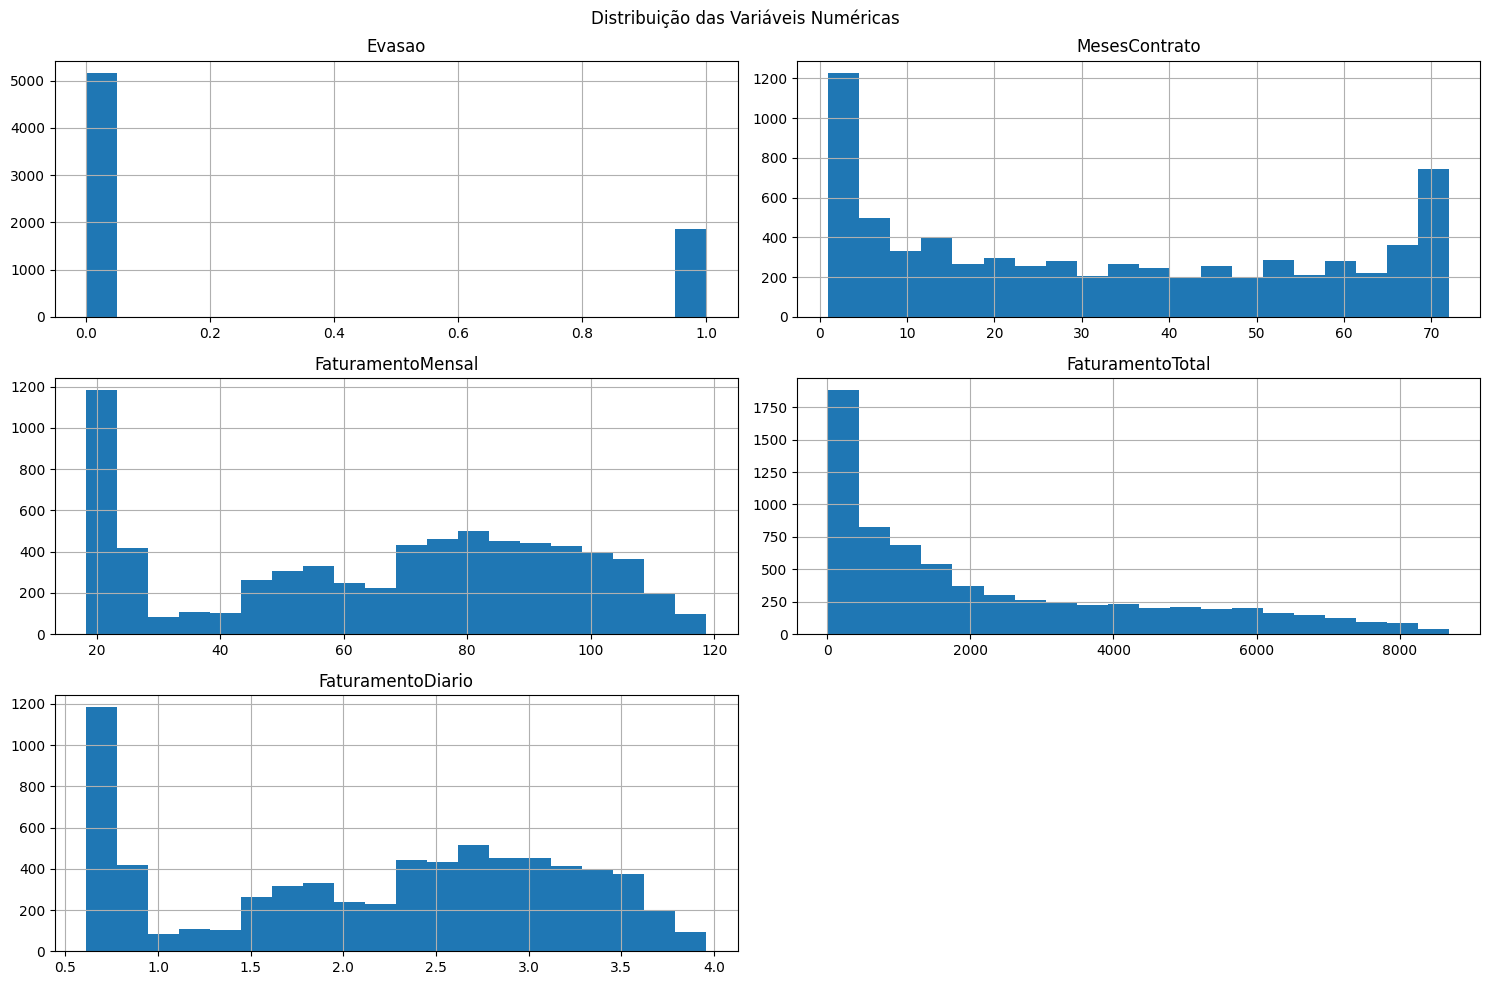

In [35]:
df = pd.read_csv('dados.csv')
df.select_dtypes(include='number').hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.tight_layout()
plt.show()

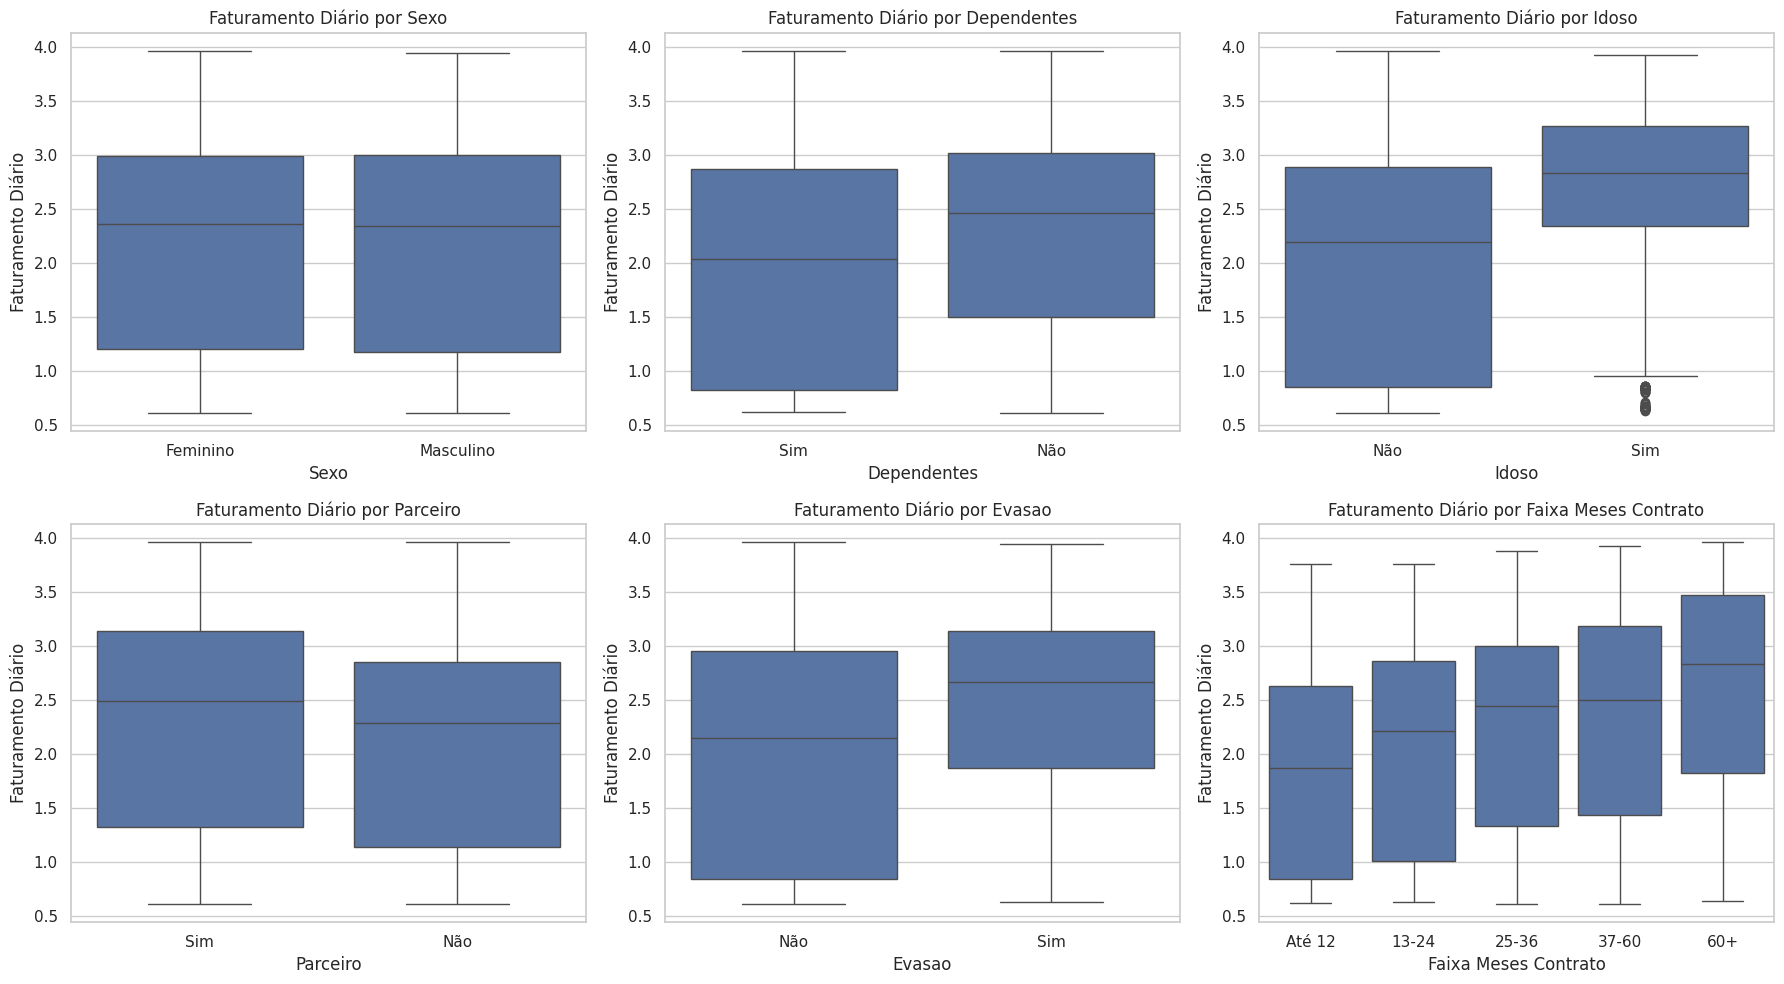

In [36]:
df = pd.read_csv('dados.csv')

df['Evasao'] = df['Evasao'].map({0: 'Não', 1: 'Sim'})

bins = [0, 12, 24, 36, 60, df['MesesContrato'].max()]
labels = ['Até 12', '13-24', '25-36', '37-60', '60+']
df['Faixa Meses Contrato'] = pd.cut(df['MesesContrato'], bins=bins, labels=labels, right=True)

sns.set(style="whitegrid")
variaveis = ['Sexo', 'Dependentes', 'Idoso', 'Parceiro', 'Evasao', 'Faixa Meses Contrato']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()

for i, var in enumerate(variaveis):
    sns.boxplot(data=df, x=var, y='FaturamentoDiario', ax=axs[i])
    axs[i].set_title(f'Faturamento Diário por {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Faturamento Diário')

plt.savefig('analise faturamento diario.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Distribuição absoluta da Evasão dos clientes

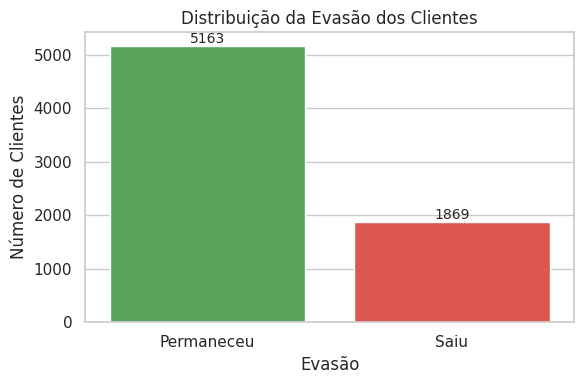

In [37]:

df = pd.read_csv('dados.csv')

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Evasao', data=df, hue='Evasao', palette=['#4caf50', '#f44336'], legend=False)

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Distribuição da Evasão dos Clientes')
plt.xlabel('Evasão')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.tight_layout()

plt.savefig('distribuicao_evasao.png', dpi=300, bbox_inches='tight')

plt.show()

Distribuição percentual da Evasão dos clientes

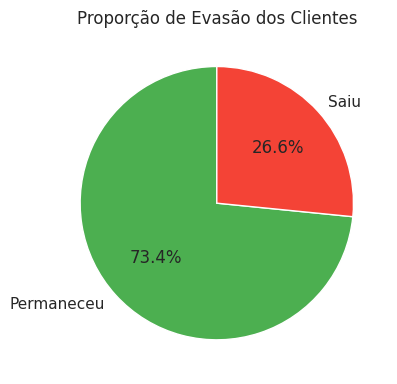

In [38]:
df = pd.read_csv('dados.csv')
plt.figure(figsize=(6, 4))
(df['Evasao']
 .value_counts(normalize=True)
 .rename({0: 'Permaneceu', 1: 'Saiu'})
 .plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4caf50', '#f44336']))
plt.title('Proporção de Evasão dos Clientes')
plt.ylabel('')
plt.tight_layout()

plt.savefig('proporcao_evasao.png', dpi=300, bbox_inches='tight')

plt.show()

Análise descritiva das variáveis numéricas em função da Evasão

In [39]:
df = pd.read_csv('dados.csv')
num_cols = df.select_dtypes(include='number').columns

def analise_descritiva(data):
    return pd.DataFrame({
        'Média': data.mean(),
        'Mediana': data.median(),
        'Moda': data.mode().iloc[0],
        'Desvio Padrão': data.std(),
        'Mínimo': data.min(),
        'Máximo': data.max()
    })

geral = analise_descritiva(df[num_cols])

grupos = {}
for valor in df['Evasao'].unique():
    grupo = df[df['Evasao'] == valor][num_cols]
    grupos[valor] = analise_descritiva(grupo)

print("Análise Geral:\n", geral.round(2), "\n")

for grupo, tabela in grupos.items():
    print(f"Análise para grupo '{grupo}' (Evasão = {grupo}):\n", tabela.round(2), "\n")

Análise Geral:
                      Média  Mediana   Moda  Desvio Padrão  Mínimo   Máximo
Evasao                0.27     0.00   0.00           0.44    0.00     1.00
MesesContrato        32.42    29.00   1.00          24.55    1.00    72.00
FaturamentoMensal    64.80    70.35  20.05          30.09   18.25   118.75
FaturamentoTotal   2283.30  1397.48  20.20        2266.77   18.80  8684.80
FaturamentoDiario     2.16     2.34   0.66           1.00    0.61     3.96 

Análise para grupo '0' (Evasão = 0):
                      Média  Mediana   Moda  Desvio Padrão  Mínimo   Máximo
Evasao                0.00     0.00   0.00           0.00    0.00     0.00
MesesContrato        37.65    38.00  72.00          24.08    1.00    72.00
FaturamentoMensal    61.31    64.45  20.05          31.09   18.25   118.75
FaturamentoTotal   2555.34  1683.60  19.75        2329.46   18.80  8672.45
FaturamentoDiario     2.04     2.15   0.66           1.04    0.61     3.96 

Análise para grupo '1' (Evasão = 1):
     

Métricas das variáveis categóricas

In [40]:
df = pd.read_csv('dados.csv')
colunas_categoricas = df.select_dtypes(include='object').columns
colunas_categoricas = [col for col in colunas_categoricas if col != 'CodigoCliente']

for col in colunas_categoricas:
    print(f"\n📊 Distribuição da coluna: {col}")
    print(df[col].value_counts(dropna=False))
    print("\n🔢 Proporção percentual:")
    print(df[col].value_counts(normalize=True, dropna=False).mul(100).round(2))


📊 Distribuição da coluna: Sexo
Sexo
Masculino    3549
Feminino     3483
Name: count, dtype: int64

🔢 Proporção percentual:
Sexo
Masculino    50.47
Feminino     49.53
Name: proportion, dtype: float64

📊 Distribuição da coluna: Idoso
Idoso
Não    5890
Sim    1142
Name: count, dtype: int64

🔢 Proporção percentual:
Idoso
Não    83.76
Sim    16.24
Name: proportion, dtype: float64

📊 Distribuição da coluna: Parceiro
Parceiro
Não    3639
Sim    3393
Name: count, dtype: int64

🔢 Proporção percentual:
Parceiro
Não    51.75
Sim    48.25
Name: proportion, dtype: float64

📊 Distribuição da coluna: Dependentes
Dependentes
Não    4933
Sim    2099
Name: count, dtype: int64

🔢 Proporção percentual:
Dependentes
Não    70.15
Sim    29.85
Name: proportion, dtype: float64

📊 Distribuição da coluna: ServicoTelefone
ServicoTelefone
Sim    6352
Não     680
Name: count, dtype: int64

🔢 Proporção percentual:
ServicoTelefone
Sim    90.33
Não     9.67
Name: proportion, dtype: float64

📊 Distribuição da coluna: 

Análise de Evasão por variáveis categóricas e numéricas

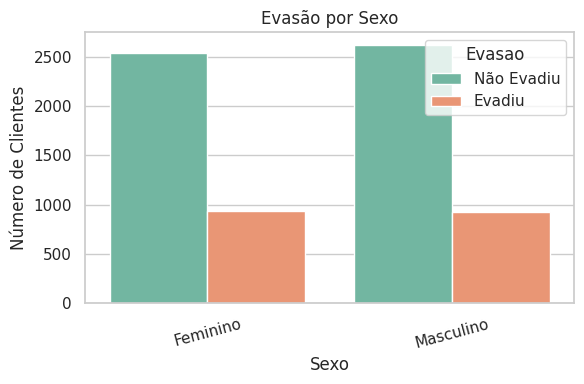

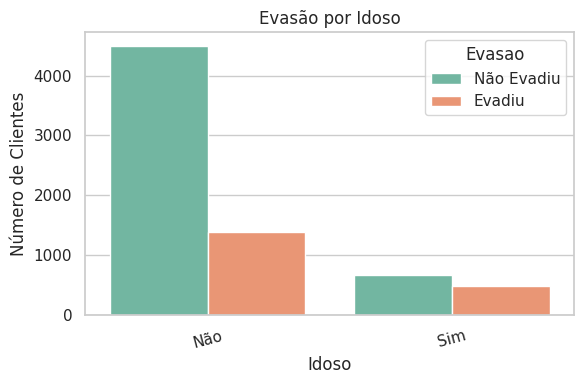

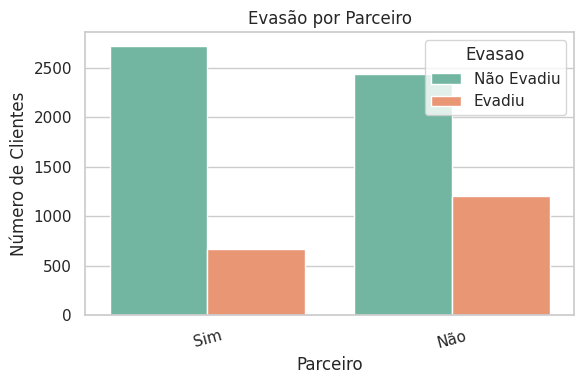

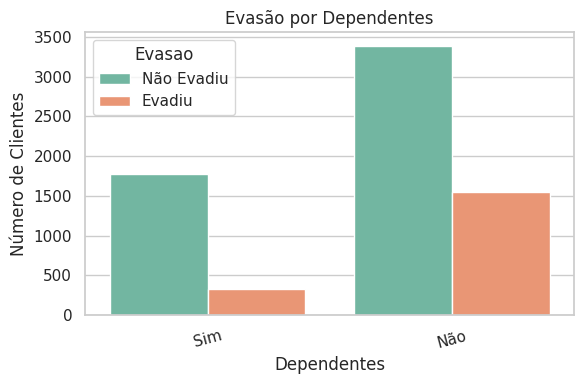

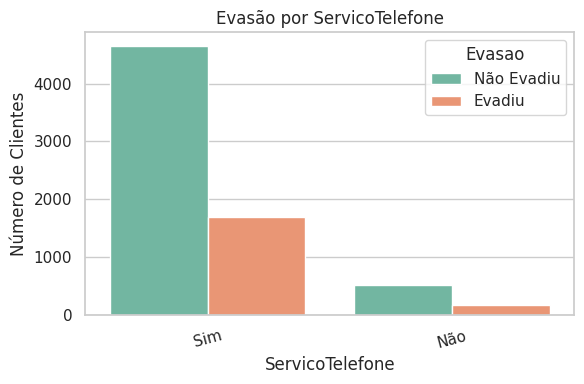

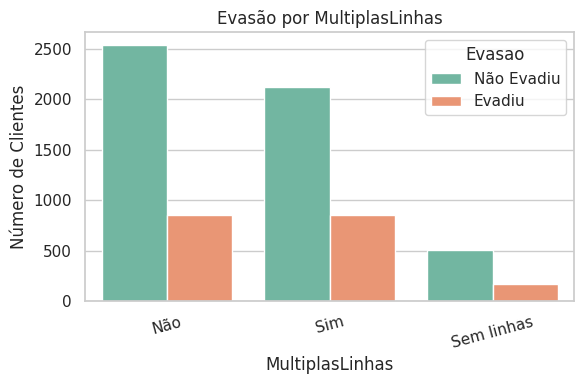

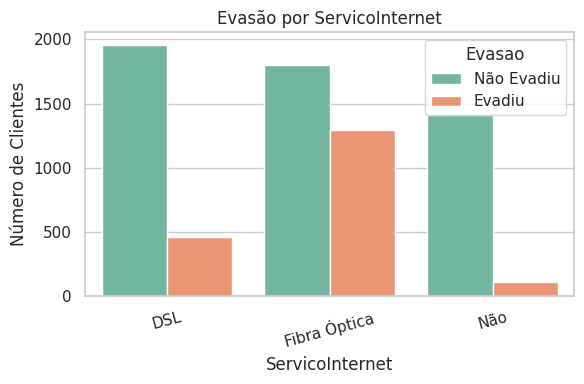

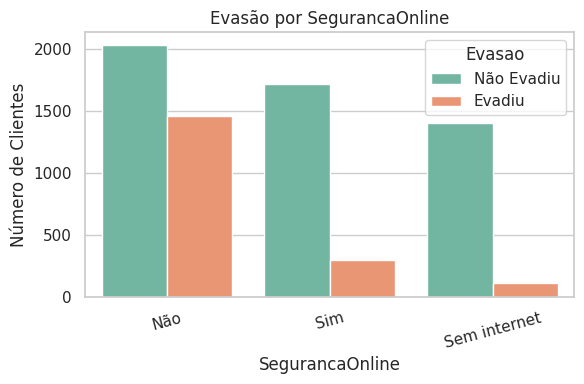

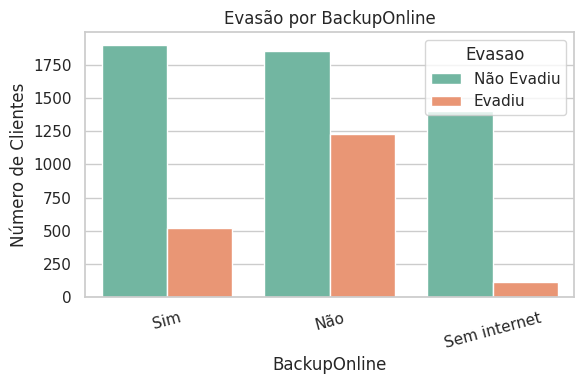

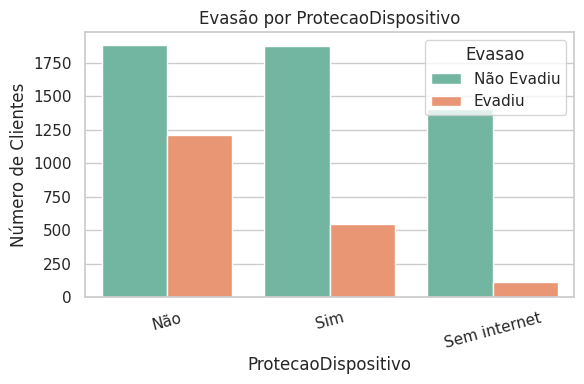

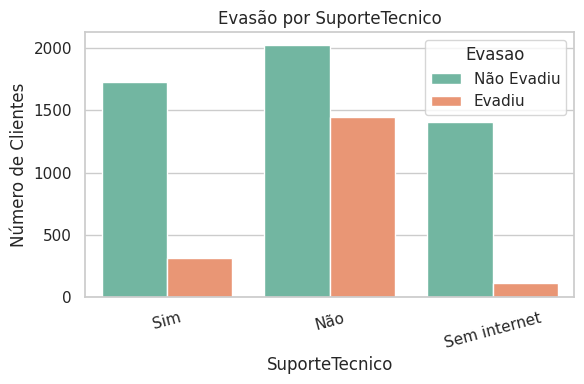

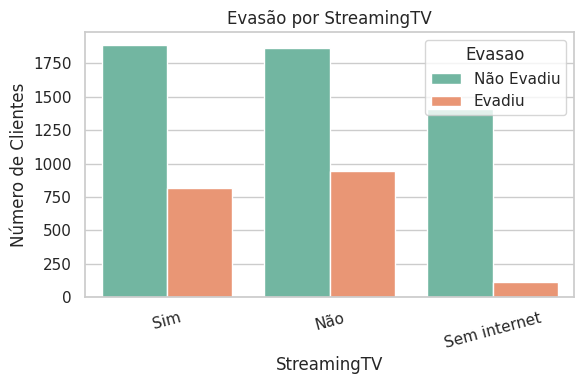

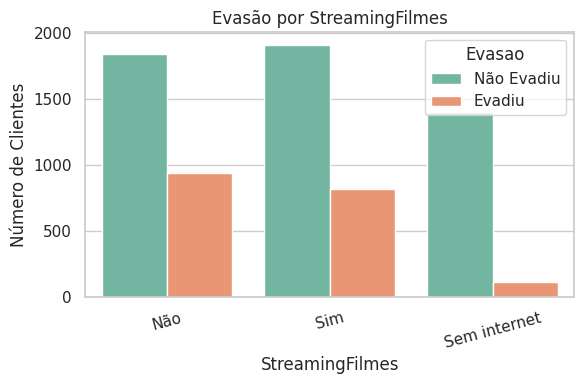

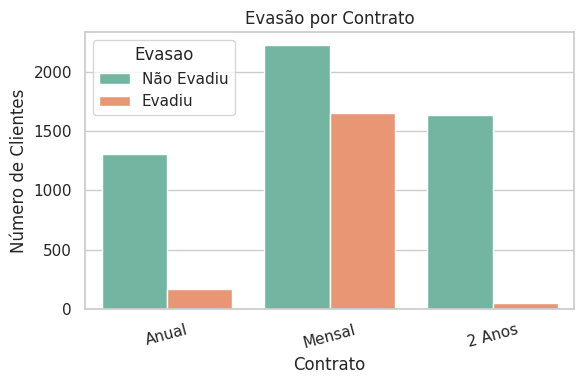

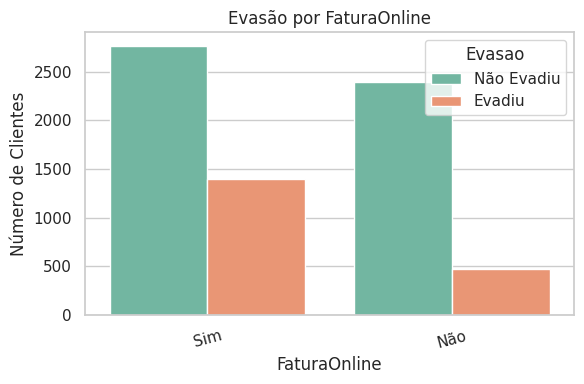

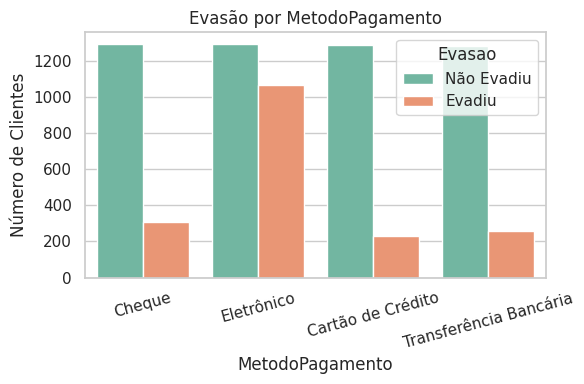

<ipython-input-41-ac8d626d9ac3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasao', y=var, palette='Set2')


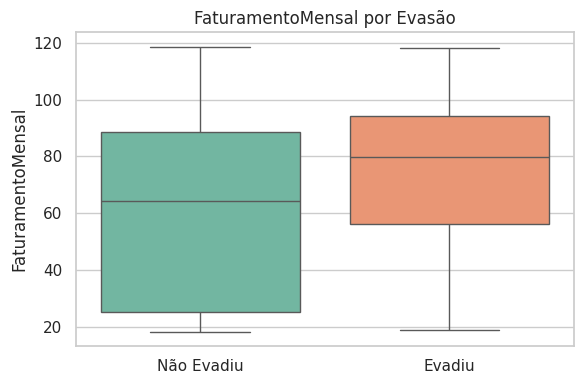

<ipython-input-41-ac8d626d9ac3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasao', y=var, palette='Set2')


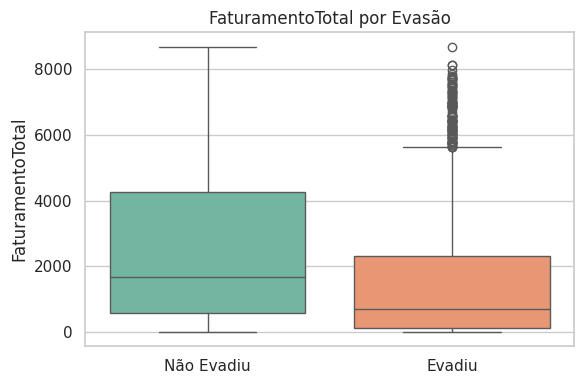

<ipython-input-41-ac8d626d9ac3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasao', y=var, palette='Set2')


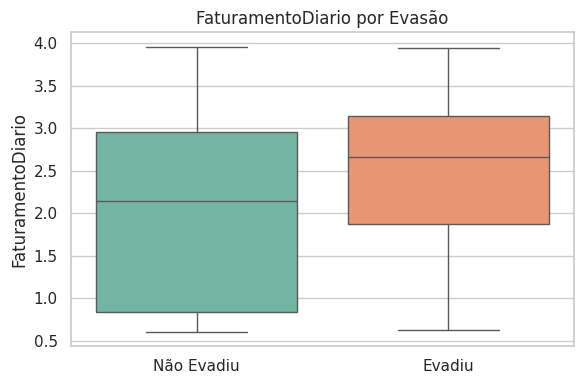

<ipython-input-41-ac8d626d9ac3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasao', y=var, palette='Set2')


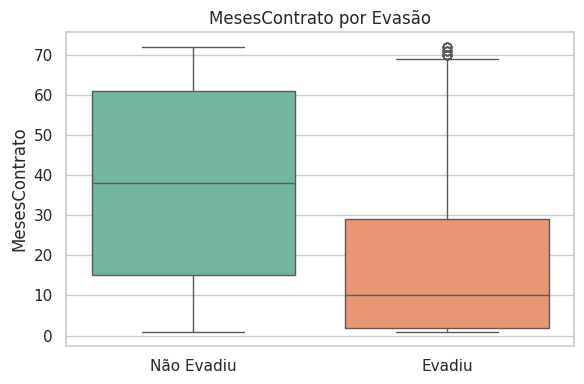

In [41]:
df = pd.read_csv('dados.csv')
df['Evasao'] = df['Evasao'].map({0: 'Não Evadiu', 1: 'Evadiu'})

sns.set(style="whitegrid")

variaveis_categoricas = [
    'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
    'ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet',
    'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
    'SuporteTecnico', 'StreamingTV', 'StreamingFilmes',
    'Contrato', 'FaturaOnline', 'MetodoPagamento'
]

for var in variaveis_categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, hue='Evasao', palette='Set2')
    plt.title(f'Evasão por {var}')
    plt.xlabel(var)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

variaveis_numericas = ['FaturamentoMensal', 'FaturamentoTotal', 'FaturamentoDiario', 'MesesContrato']

for var in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Evasao', y=var, palette='Set2')
    plt.title(f'{var} por Evasão')
    plt.xlabel('')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

Correlação entre variáveis numéricas e Evasão
*   Valores positivos: maior valor → maior chance de evasão
*   Valores negativos: maior valor → menor chance de evasão

📊 Correlação com a variável 'Evasão':
FaturamentoDiario    0.192914
FaturamentoMensal    0.192858
FaturamentoTotal    -0.199484
MesesContrato       -0.354049
Name: Evasao, dtype: float64


<ipython-input-42-26d2811ff5ae>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='coolwarm')


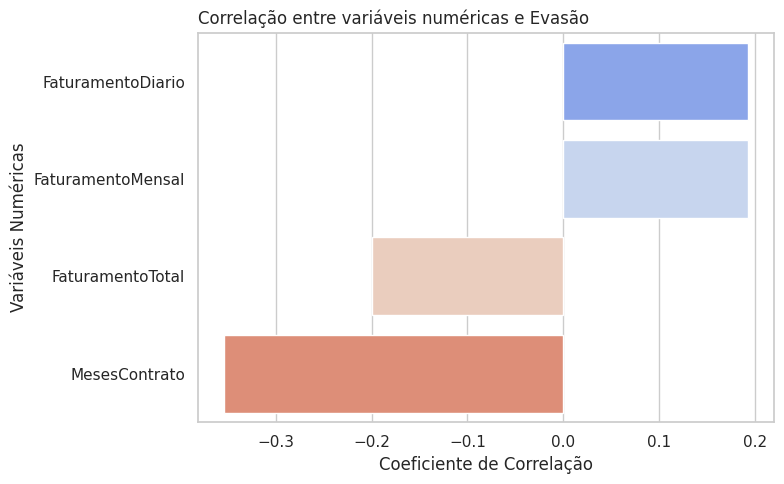

In [42]:
df = pd.read_csv('dados.csv')
df['Evasao'] = df['Evasao'].astype(int)

df_numericas = df.select_dtypes(include=['int64', 'float64'])

correlacoes_matrix = df_numericas.corr()

correlacoes = correlacoes_matrix['Evasao'].drop('Evasao').sort_values(ascending=False)

print("📊 Correlação com a variável 'Evasão':")
print(correlacoes)

plt.figure(figsize=(8, 5))
sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='coolwarm')
plt.title("Correlação entre variáveis numéricas e Evasão", loc='left')
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Variáveis Numéricas")
plt.grid(True, axis='x')
plt.tight_layout()

plt.savefig('correlacao variaveis numericas.png', dpi=300, bbox_inches='tight')

plt.show()

Impacto das variáveis categóricas na Evasão

In [43]:
df = pd.read_csv('dados.csv')

colunas_categoricas = df.select_dtypes(include='object').drop(columns=['CodigoCliente'], errors='ignore').columns

proporcoes_evasao = {}
impacto_total = []

for col in colunas_categoricas:
    proporcao = df.groupby(col)['Evasao'].mean().sort_values(ascending=False)
    proporcoes_evasao[col] = proporcao
    impacto = proporcao.max() - proporcao.min()
    impacto_total.append((col, impacto))

variaveis_ordenadas = sorted(impacto_total, key=lambda x: x[1], reverse=True)

for col, impacto in variaveis_ordenadas:
    print(f"\n📊 {col} — impacto: {impacto:.2f}")
    display(proporcoes_evasao[col].head(3))


📊 Contrato — impacto: 0.40


Contrato
Mensal    0.427097
Anual     0.112772
2 Anos    0.028487
Name: Evasao, dtype: float64


📊 ServicoInternet — impacto: 0.34


ServicoInternet
Fibra Óptica    0.418928
DSL             0.189983
Não             0.074342
Name: Evasao, dtype: float64


📊 SegurancaOnline — impacto: 0.34


SegurancaOnline
Não             0.417787
Sim             0.146402
Sem internet    0.074342
Name: Evasao, dtype: float64


📊 SuporteTecnico — impacto: 0.34


SuporteTecnico
Não             0.416475
Sim             0.151961
Sem internet    0.074342
Name: Evasao, dtype: float64


📊 BackupOnline — impacto: 0.33


BackupOnline
Não             0.399417
Sim             0.215670
Sem internet    0.074342
Name: Evasao, dtype: float64


📊 ProtecaoDispositivo — impacto: 0.32


ProtecaoDispositivo
Não             0.391403
Sim             0.225393
Sem internet    0.074342
Name: Evasao, dtype: float64


📊 MetodoPagamento — impacto: 0.30


MetodoPagamento
Eletrônico                0.452854
Cheque                    0.192020
Transferência Bancária    0.167315
Name: Evasao, dtype: float64


📊 StreamingFilmes — impacto: 0.26


StreamingFilmes
Não             0.337289
Sim             0.299524
Sem internet    0.074342
Name: Evasao, dtype: float64


📊 StreamingTV — impacto: 0.26


StreamingTV
Não             0.335351
Sim             0.301147
Sem internet    0.074342
Name: Evasao, dtype: float64


📊 Idoso — impacto: 0.18


Idoso
Sim    0.416813
Não    0.236503
Name: Evasao, dtype: float64


📊 FaturaOnline — impacto: 0.17


FaturaOnline
Sim    0.335893
Não    0.163757
Name: Evasao, dtype: float64


📊 Dependentes — impacto: 0.16


Dependentes
Não    0.312791
Sim    0.155312
Name: Evasao, dtype: float64


📊 Parceiro — impacto: 0.13


Parceiro
Não    0.329761
Sim    0.197171
Name: Evasao, dtype: float64


📊 MultiplasLinhas — impacto: 0.04


MultiplasLinhas
Sim           0.286485
Não           0.250812
Sem linhas    0.250000
Name: Evasao, dtype: float64


📊 ServicoTelefone — impacto: 0.02


ServicoTelefone
Sim    0.267475
Não    0.250000
Name: Evasao, dtype: float64


📊 Sexo — impacto: 0.01


Sexo
Feminino     0.269595
Masculino    0.262046
Name: Evasao, dtype: float64

Correlação das variáveis categóricas e Evasão

<ipython-input-44-c06d82af02d1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_impacto, x='Impacto', y='Variável', palette='coolwarm')


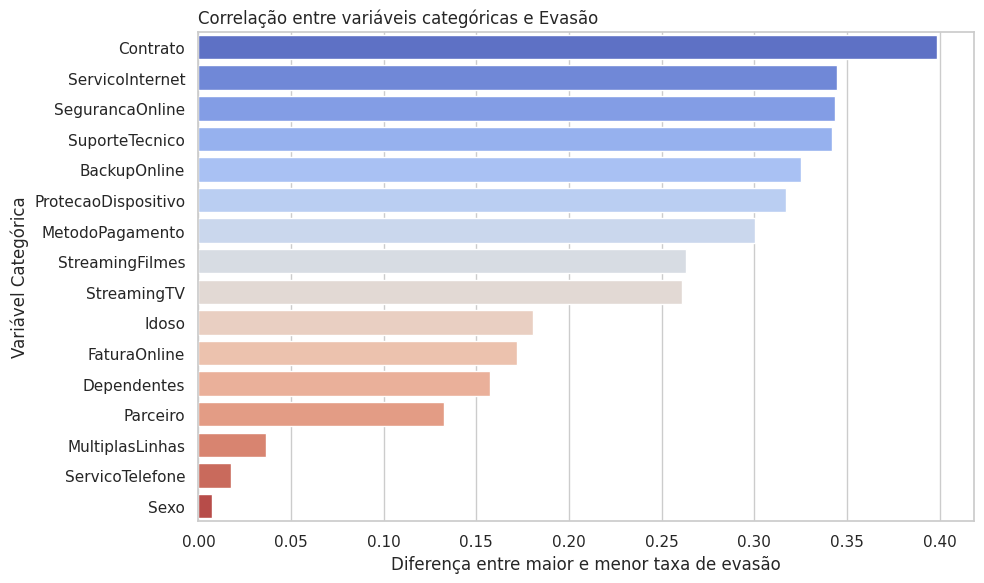

In [44]:
df = pd.read_csv('dados.csv')
colunas_categoricas = df.select_dtypes(include='object').drop(columns=['CodigoCliente'], errors='ignore').columns

proporcoes_evasao = {}
impacto_total = []

for col in colunas_categoricas:
    proporcao = df.groupby(col)['Evasao'].mean().sort_values(ascending=False)
    proporcoes_evasao[col] = proporcao

    impacto = proporcao.max() - proporcao.min()
    impacto_total.append((col, impacto))

variaveis_ordenadas = sorted(impacto_total, key=lambda x: x[1], reverse=True)

df_impacto = pd.DataFrame(variaveis_ordenadas, columns=['Variável', 'Impacto'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df_impacto, x='Impacto', y='Variável', palette='coolwarm')
plt.title('Correlação entre variáveis categóricas e Evasão', loc='left')
plt.xlabel('Diferença entre maior e menor taxa de evasão')
plt.ylabel('Variável Categórica')
plt.tight_layout()

plt.savefig('correlacao variaveis categoricas.png', dpi=300, bbox_inches='tight')

plt.show()

Taxas de Evasão das variáveis categóricas e médias das numéricas por Evasão

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


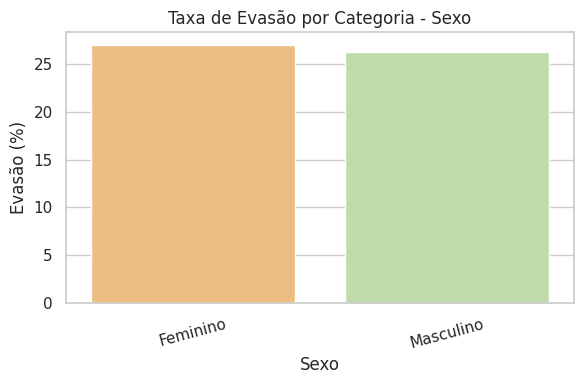

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


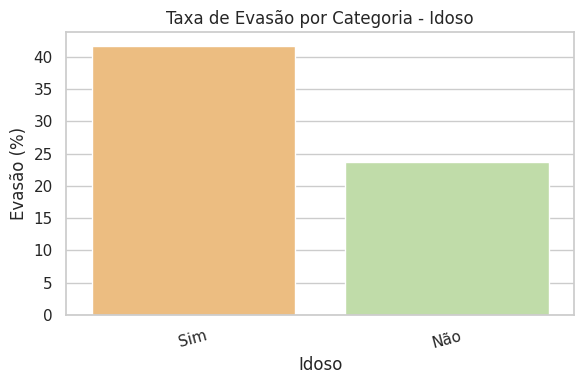

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


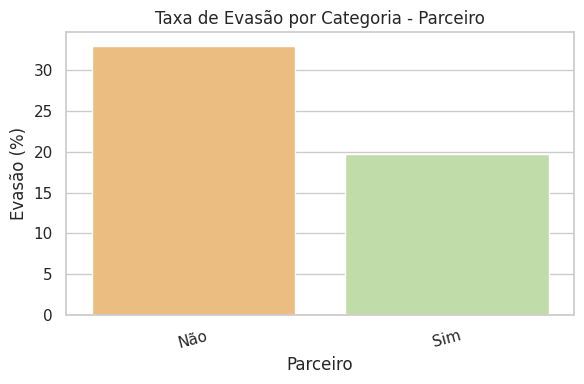

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


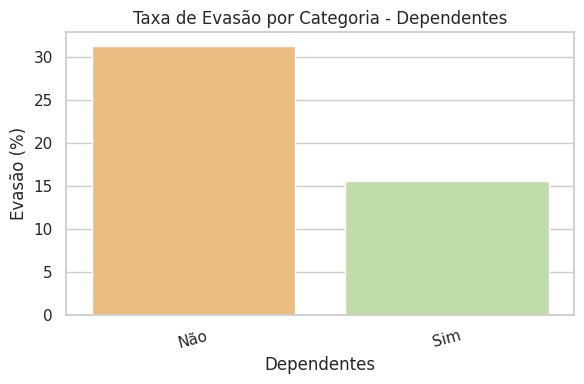

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


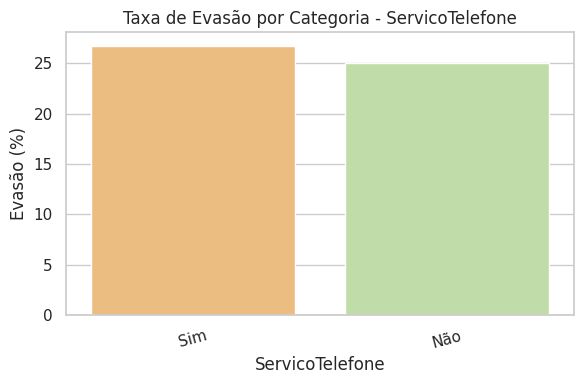

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


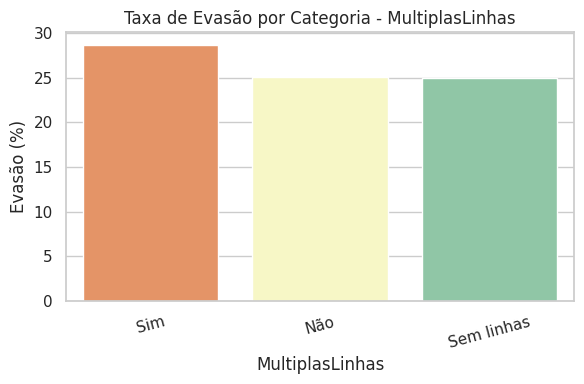

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


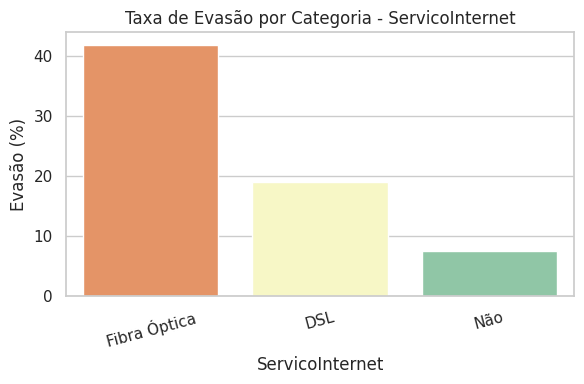

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


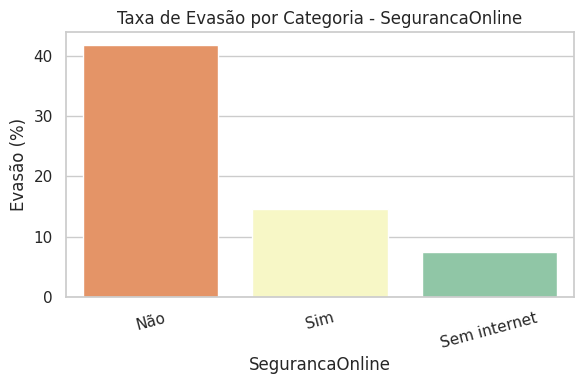

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


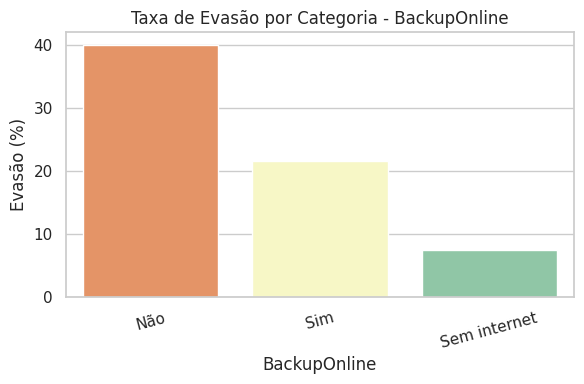

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


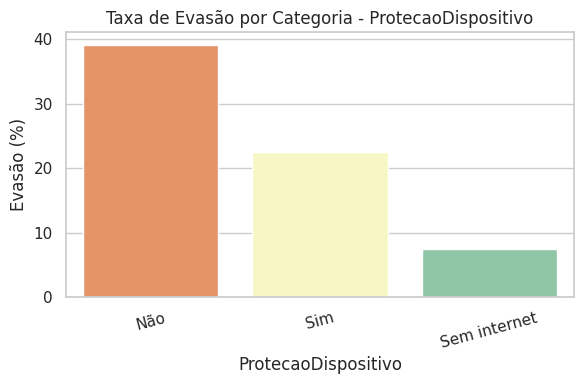

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


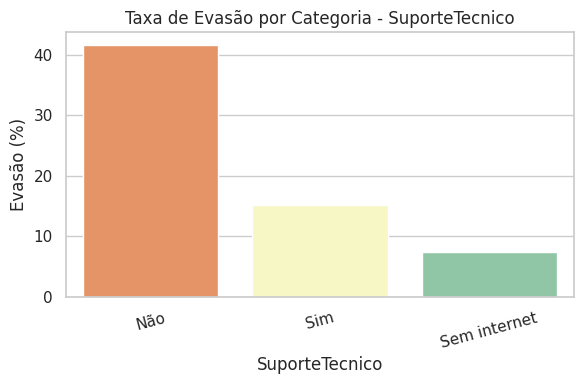

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


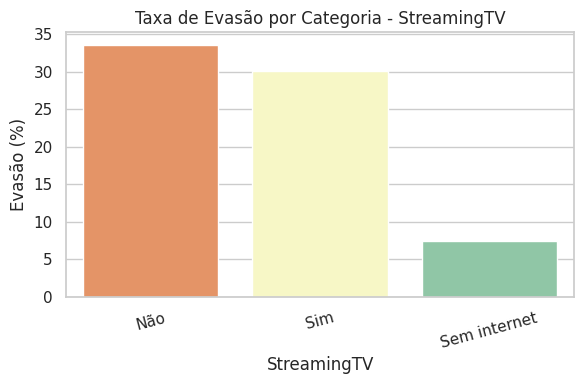

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


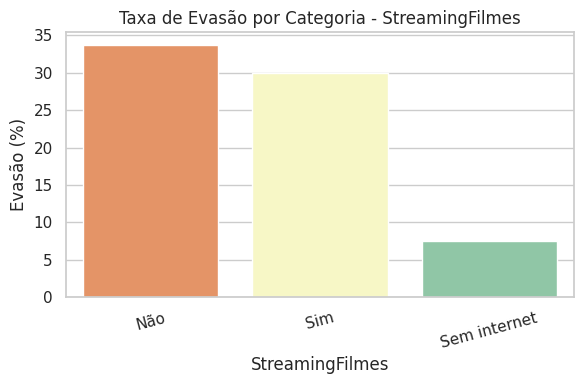

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


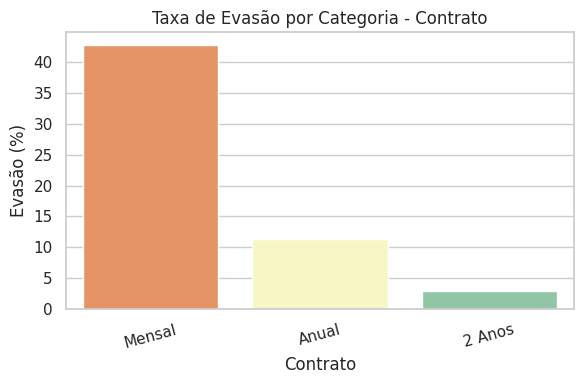

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


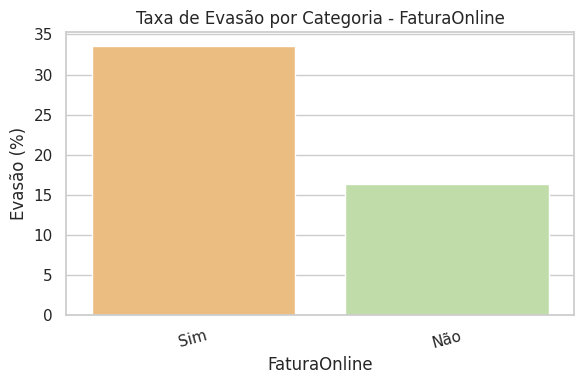

<ipython-input-45-22dfd6ea71d2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')


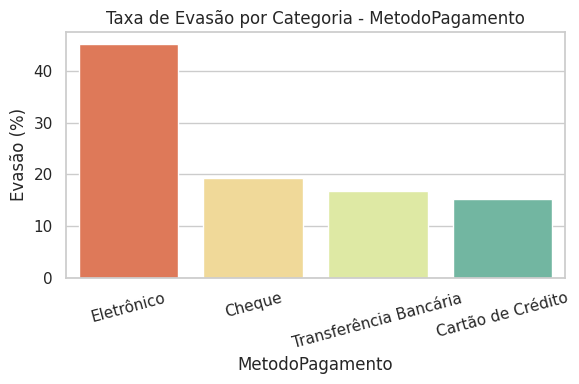

<ipython-input-45-22dfd6ea71d2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias.index, y=medias.values, palette='Set2')


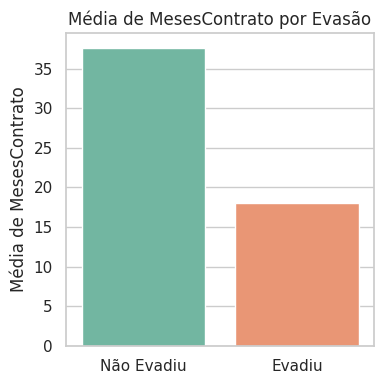

<ipython-input-45-22dfd6ea71d2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias.index, y=medias.values, palette='Set2')


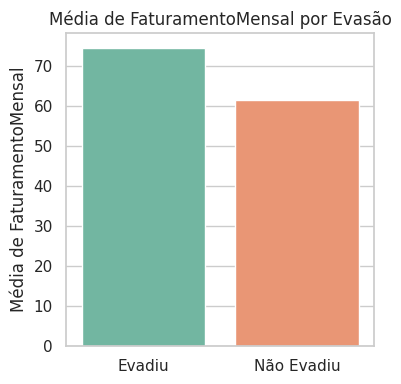

<ipython-input-45-22dfd6ea71d2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias.index, y=medias.values, palette='Set2')


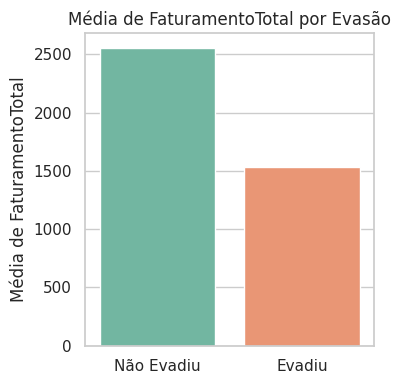

<ipython-input-45-22dfd6ea71d2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias.index, y=medias.values, palette='Set2')


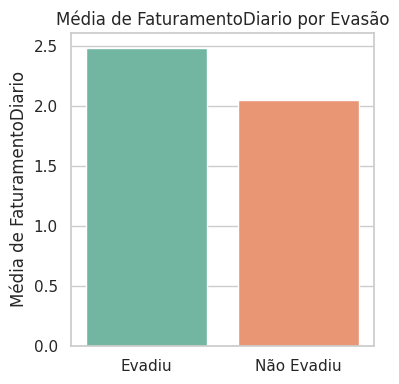

In [45]:
df = pd.read_csv('dados.csv')
df['Evasao'] = df['Evasao'].map({0: 'Não Evadiu', 1: 'Evadiu'})

variaveis_categoricas = [
    'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
    'ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet',
    'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
    'SuporteTecnico', 'StreamingTV', 'StreamingFilmes',
    'Contrato', 'FaturaOnline', 'MetodoPagamento'
]

for var in variaveis_categoricas:
    taxa = df.groupby(var)['Evasao'].value_counts(normalize=True).unstack().fillna(0)['Evadiu'] * 100
    taxa = taxa.sort_values(ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=taxa.index, y=taxa.values, palette='Spectral')
    plt.title(f"Taxa de Evasão por Categoria - {var}")
    plt.ylabel("Evasão (%)")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

variaveis_numericas = ['MesesContrato', 'FaturamentoMensal', 'FaturamentoTotal', 'FaturamentoDiario']

for var in variaveis_numericas:
    medias = df.groupby('Evasao')[var].mean()
    medias = medias.sort_values(ascending=False)

    plt.figure(figsize=(4, 4))
    sns.barplot(x=medias.index, y=medias.values, palette='Set2')
    plt.title(f"Média de {var} por Evasão")
    plt.ylabel(f"Média de {var}")
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

Correlação entre variáveis numéricas e categóricas com a Evasão:
*   Valores positivos: associadas a maior chance de evasão.
*   Valores negativos: associadas à permanência.

<ipython-input-46-8ff46f112029>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='coolwarm')


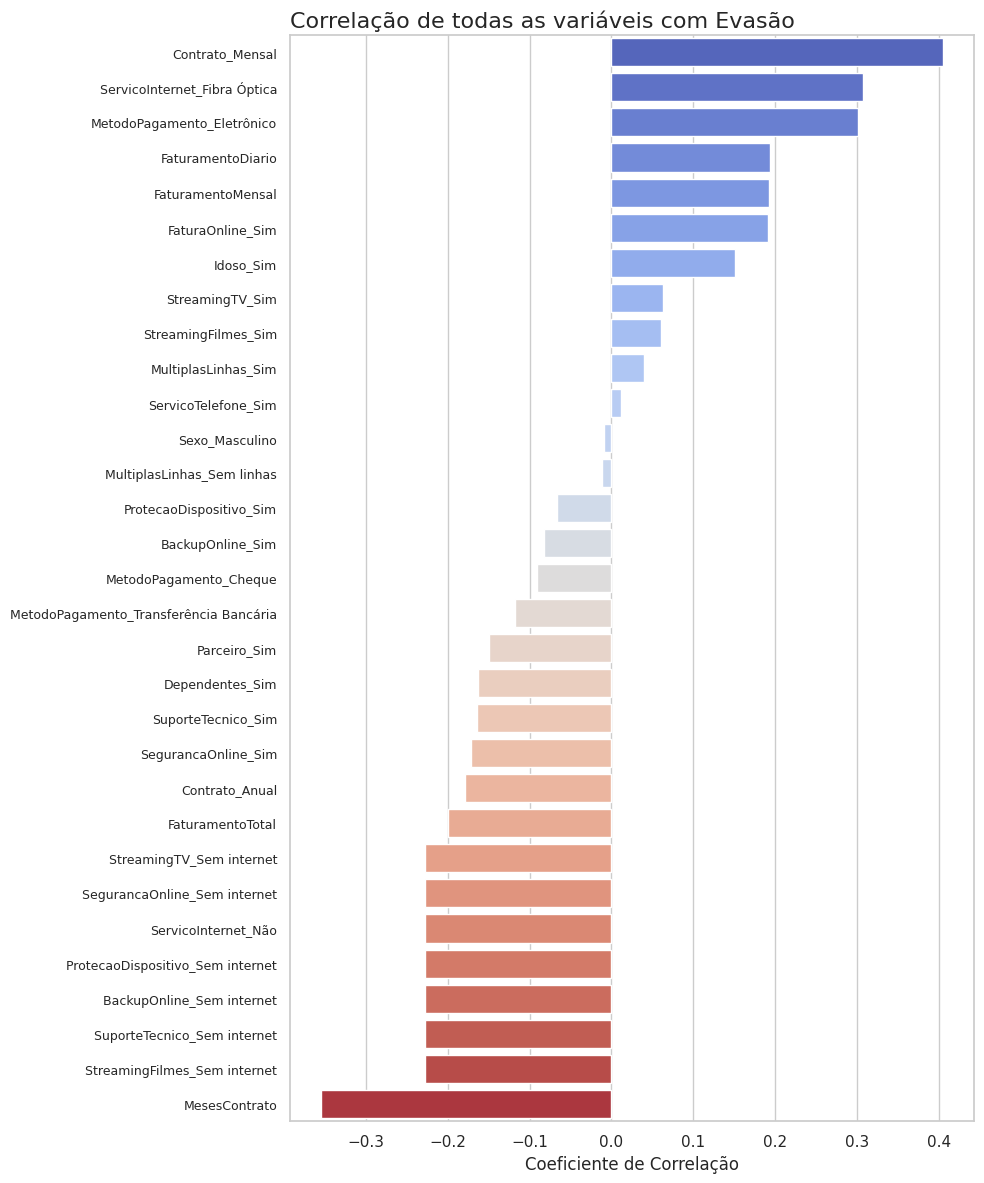

In [46]:
df = pd.read_csv('dados.csv')
df_corr = df.copy()
df_corr['Evasao'] = df_corr['Evasao'].astype(int)

df_corr_encoded = pd.get_dummies(df_corr.drop(columns=['CodigoCliente']), drop_first=True)

correlacoes = df_corr_encoded.corr()['Evasao'].drop('Evasao').sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='coolwarm')

plt.title("Correlação de todas as variáveis com Evasão", fontsize=16, loc='left')

plt.xlabel("Coeficiente de Correlação", fontsize=12)
plt.ylabel("")

plt.yticks(fontsize=9)

plt.grid(True, axis='x')
plt.tight_layout()

plt.savefig('correlacao todas variaveis.png', dpi=300, bbox_inches='tight')

plt.show()

Gráfico das variáveis mais associadas à Evasão de clientes

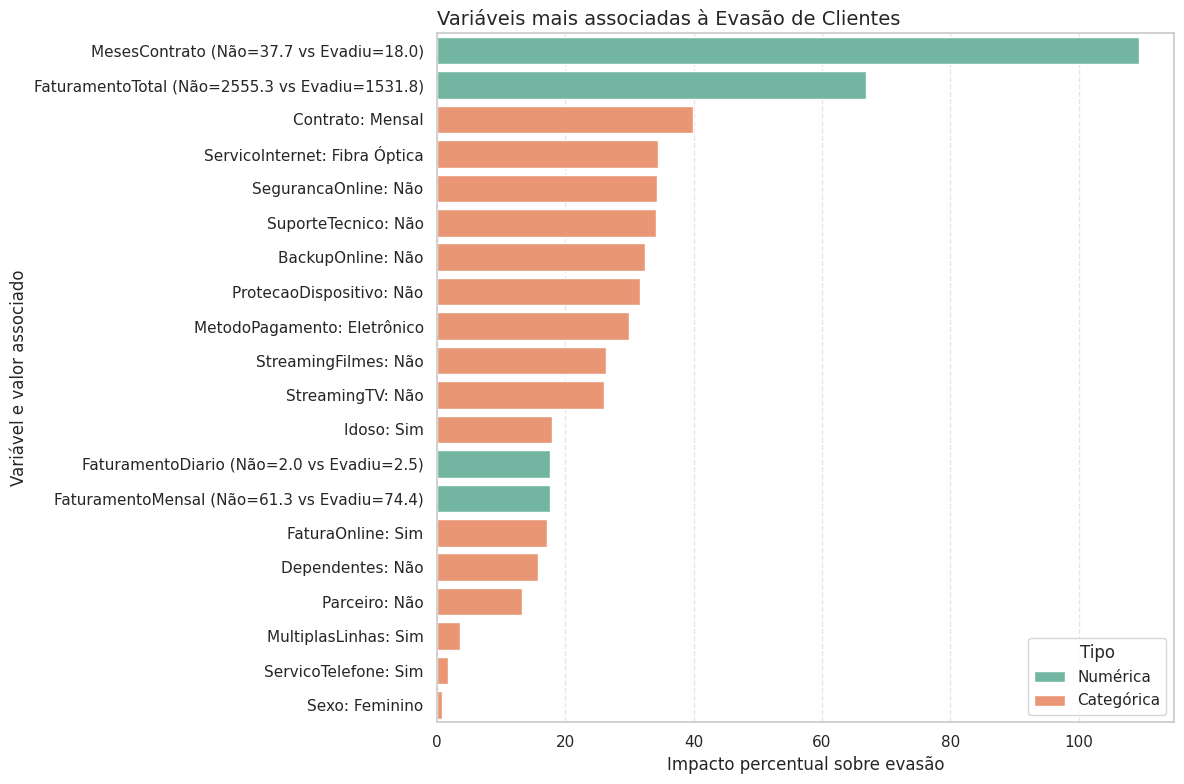

In [47]:
df = pd.read_csv("dados.csv")
df['Evasao'] = df['Evasao'].map({0: 'Não Evadiu', 1: 'Evadiu'})

variaveis_categoricas = [
    'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
    'ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet',
    'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
    'SuporteTecnico', 'StreamingTV', 'StreamingFilmes',
    'Contrato', 'FaturaOnline', 'MetodoPagamento'
]

resumo = []

for var in variaveis_categoricas:
    taxa = (
        df.groupby(var)['Evasao']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)['Evadiu'] * 100
    )
    categoria = taxa.idxmax()
    impacto = taxa.max() - taxa.min()

    resumo.append({
        'Variável': f"{var}: {categoria}",
        'Tipo': 'Categórica',
        'Impacto (%)': round(impacto, 1)
    })

variaveis_numericas = ['MesesContrato', 'FaturamentoMensal', 'FaturamentoTotal', 'FaturamentoDiario']
for var in variaveis_numericas:
    media_evadiu = df[df['Evasao'] == 'Evadiu'][var].mean()
    media_nao = df[df['Evasao'] == 'Não Evadiu'][var].mean()
    impacto = abs(media_evadiu - media_nao) / media_evadiu * 100 if media_evadiu != 0 else 0
    resumo.append({
        'Variável': f"{var} (Não={media_nao:.1f} vs Evadiu={media_evadiu:.1f})",
        'Tipo': 'Numérica',
        'Impacto (%)': round(impacto, 1)
    })

df_evasao = pd.DataFrame(resumo).sort_values(by='Impacto (%)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_evasao, x='Impacto (%)', y='Variável', hue='Tipo', palette='Set2')
plt.title('Variáveis mais associadas à Evasão de Clientes', loc='left', fontsize=14)
plt.xlabel('Impacto percentual sobre evasão')
plt.ylabel('Variável e valor associado')
plt.legend(title='Tipo')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('grafico evasao.png', dpi=300)

plt.show()

Gráfico das variáveis categóricas mais associadas à Permanência de clientes

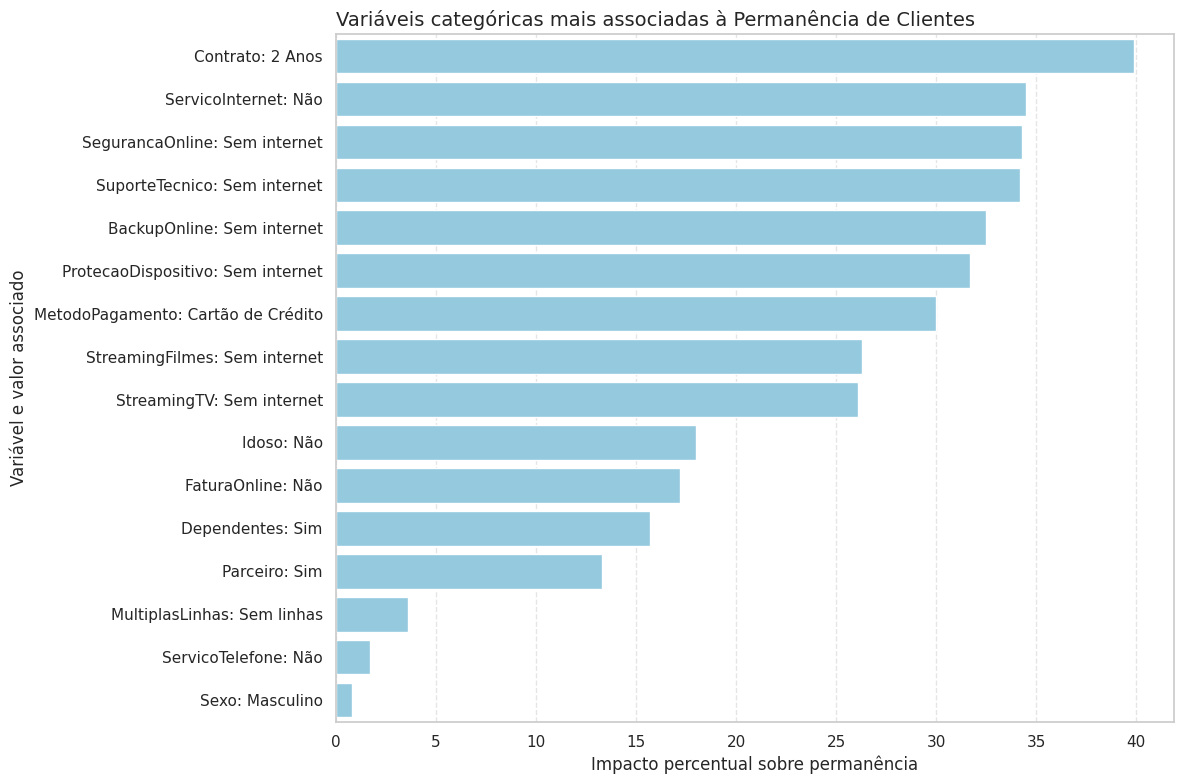

In [48]:
df = pd.read_csv("dados.csv")
df['Evasao'] = df['Evasao'].map({0: 'Não Evadiu', 1: 'Evadiu'})

variaveis_categoricas = [
    'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
    'ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet',
    'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
    'SuporteTecnico', 'StreamingTV', 'StreamingFilmes',
    'Contrato', 'FaturaOnline', 'MetodoPagamento'
]

resumo = []

for var in variaveis_categoricas:
    taxa = (
        df.groupby(var)['Evasao']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)['Evadiu'] * 100
    )
    categoria = taxa.idxmin()
    impacto = taxa.max() - taxa.min()

    resumo.append({
        'Variável': f"{var}: {categoria}",
        'Impacto (%)': round(impacto, 1)
    })

df_permanencia = pd.DataFrame(resumo).sort_values(by='Impacto (%)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_permanencia, x='Impacto (%)', y='Variável', color='skyblue')
plt.title('Variáveis categóricas mais associadas à Permanência de Clientes', loc='left', fontsize=14)
plt.xlabel('Impacto percentual sobre permanência')
plt.ylabel('Variável e valor associado')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('grafico permanencia.png', dpi=300)

plt.show()

#📄Relatorio Final

# **1- Introdução**

A Evasão de clientes, ou Churn, representa um dos principais desafios para a sustentabilidade e crescimento de empresas de serviços recorrentes.

A análise feita neste estudo foi embasada em dados estatísticos, e tem como objetivo identificar os fatores mais associados à evasão, compreender os padrões de comportamento dos clientes e sugerir estratégias concretas para sua retenção.

# **2- Limpeza e Tratamento de Dados**

Os dados, no formato JSON, foram importados da API da Telecom X utilizando Python, e convertidos para um DataFrame do Pandas.

Os dados contêm informações sobre 7267 clientes, incluindo dados demográficos, tipos de serviços contratados e status de evasão.

A estrutura de dados do DataFrame original (dicionários aninhados) foi normalizada, criando colunas discretas para cada uma das variáveis, com nomes e valôres alterados para melhor compreensão.

Após uma inspeção prévia nos dados, verificou-se não haver clientes duplicados, mas 224 clientes não tinham a informação de “Evasão”, e foram eliminados do arquivo.

Outros 11 clientes estavam com informação de “Faturamento Total” ausentes e também foram excluídos, resultando em 7032 clientes para serem analisados.

A variável “Faturamento Diário” foi criada à partir do “Faturamento Mensal”, dividindo o seu valor por 30, para auxiliar nas análises.

A tabela abaixo mostra o formato final do DataFrame após as alterações, com as variáveis numéricas e os conteúdos existentes das variáveis categóricas:


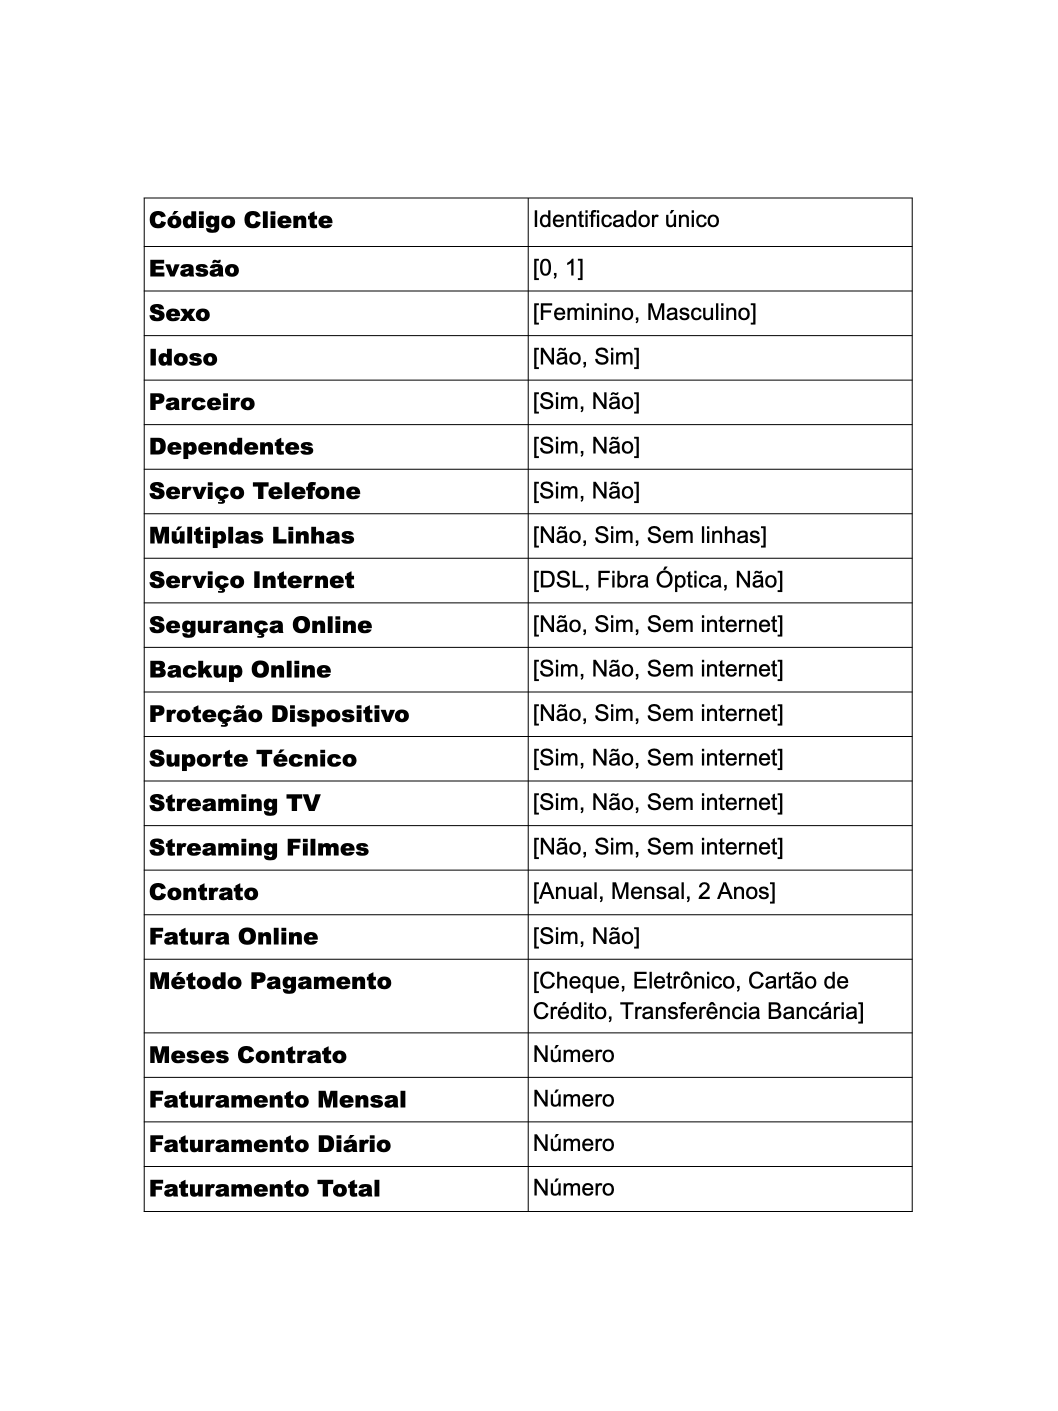

# **3- Análise Exploratória de Dados:**

Foram realizadas análises métricas, estatísticas e gráficas detalhadas com todas as variáveis, visando avaliar o comportamento dos clientes e sua relação com a evasão ou permanência. A seguir, os principais achados:

1.   **Faturamento Diário por Variáveis Demográficas, Contratuais e de Evasão**

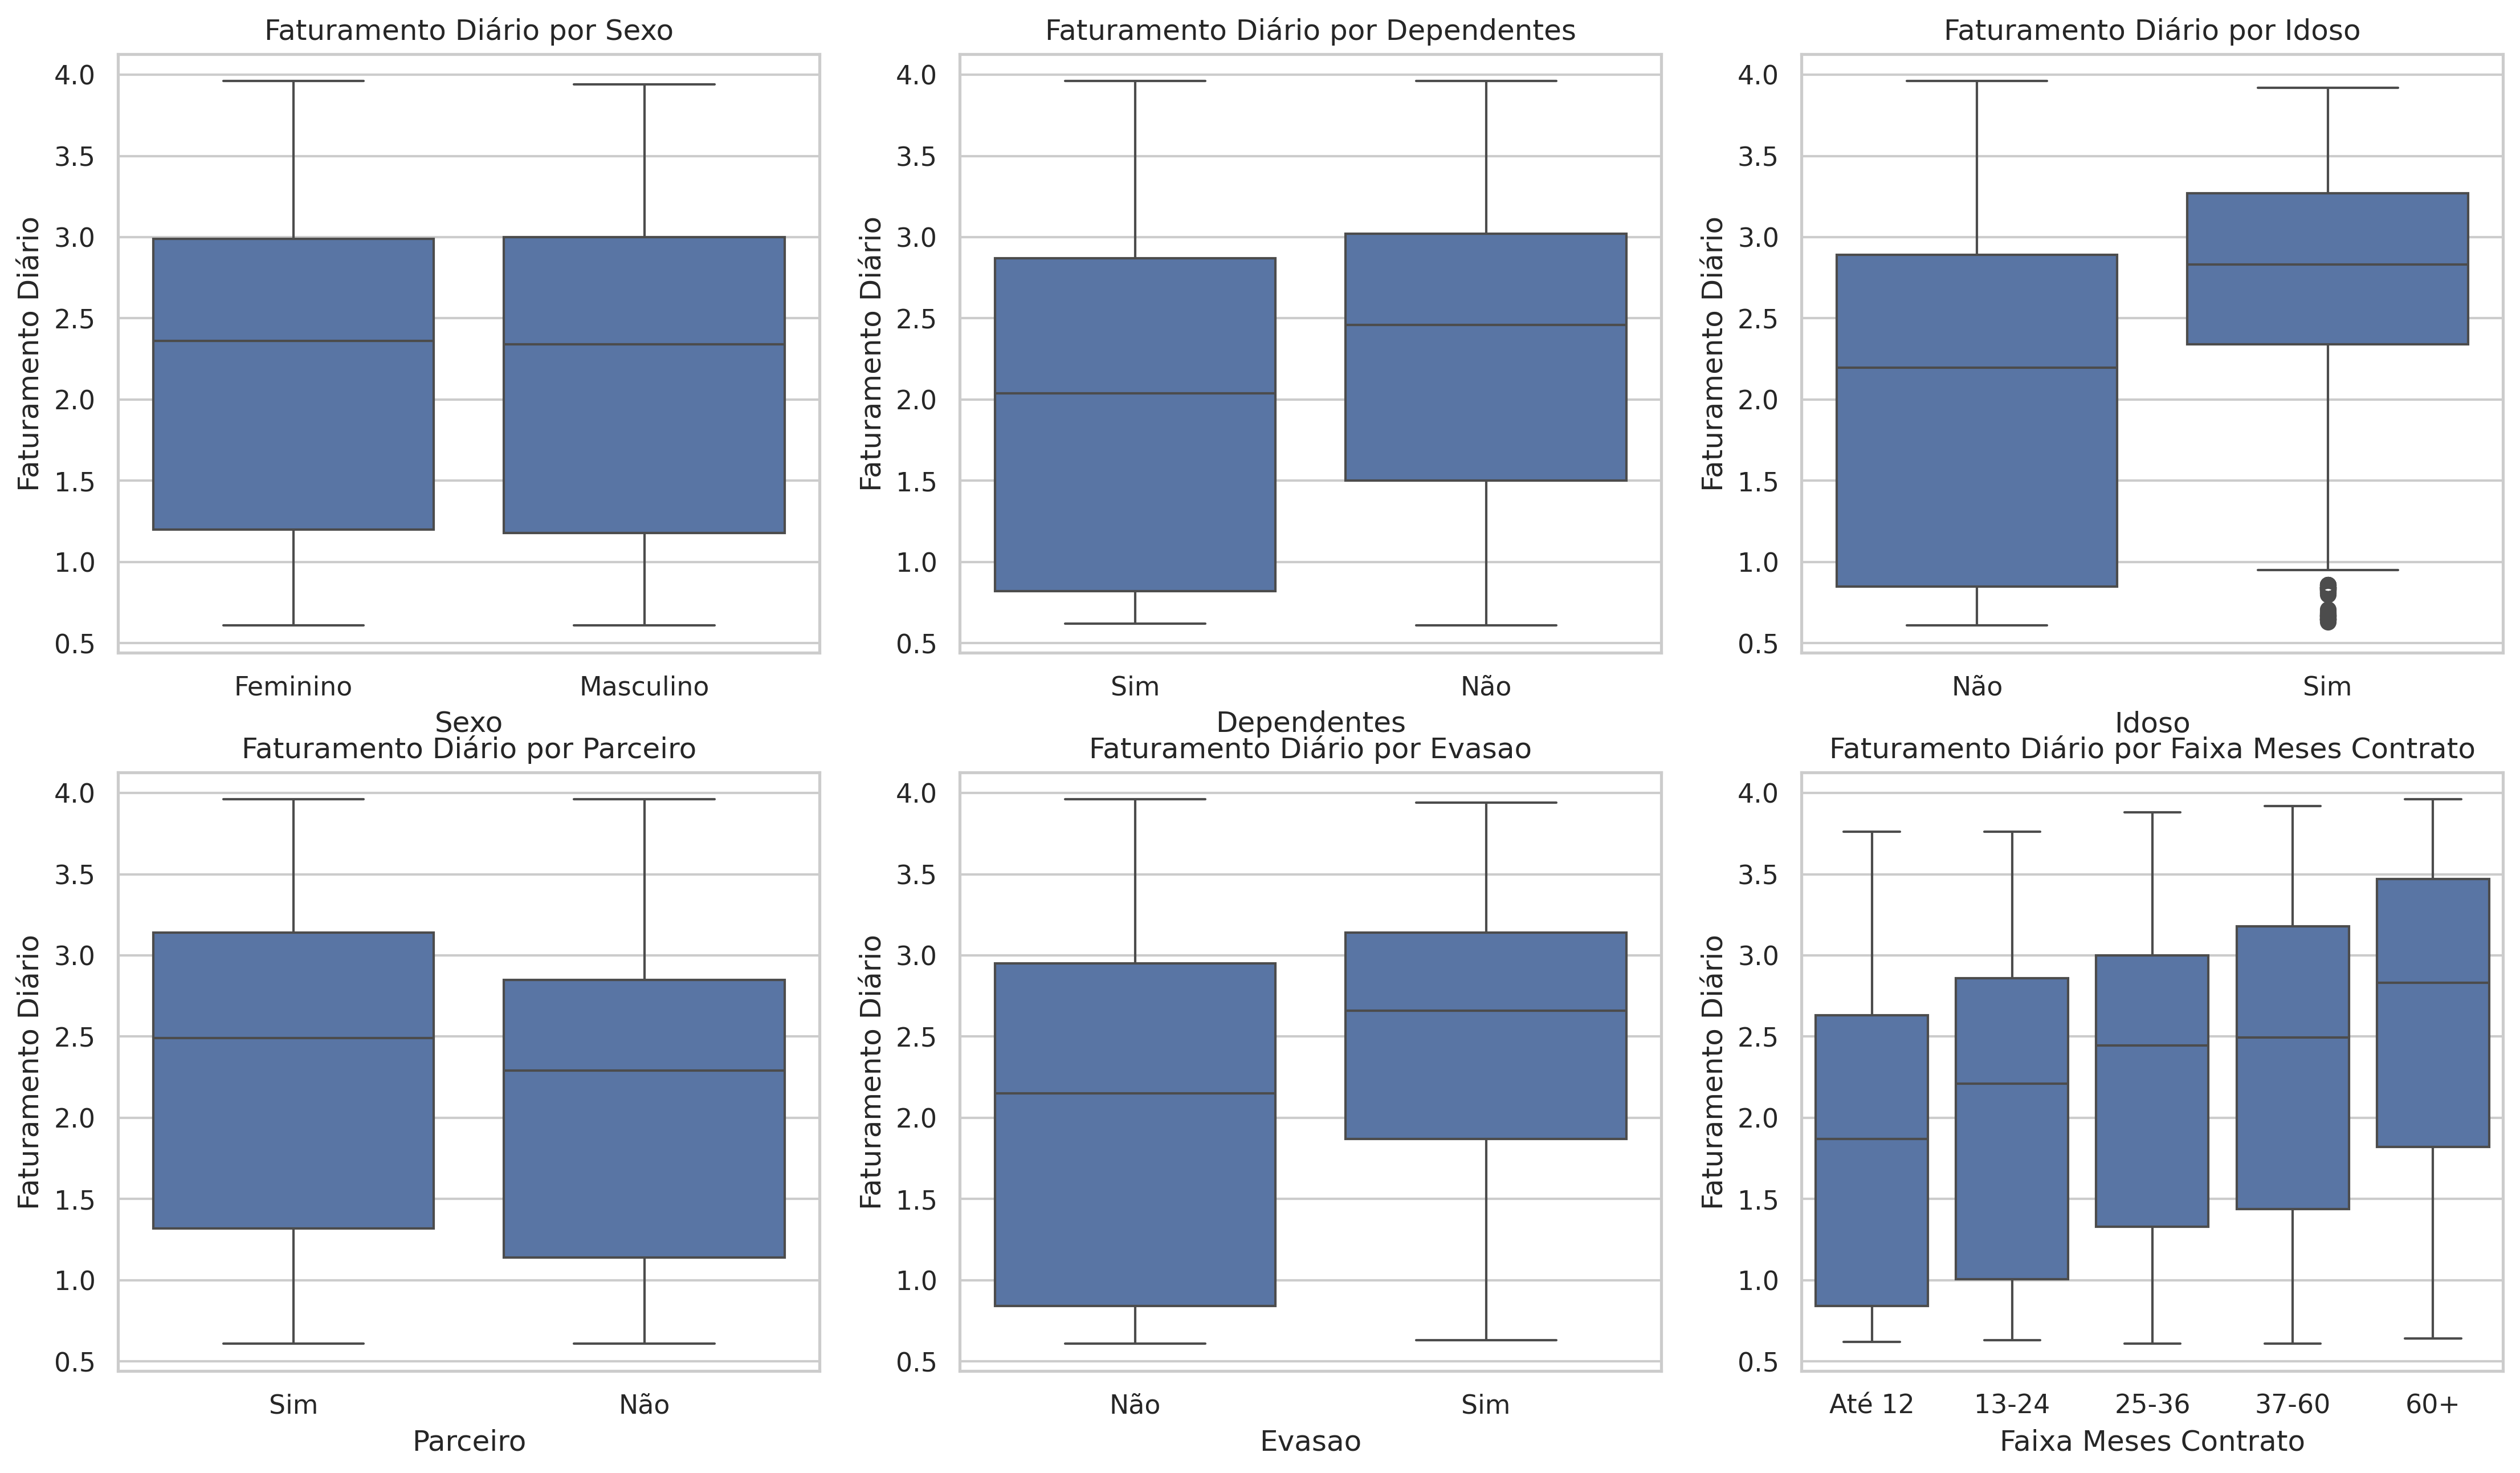

Os gráficos acima revelam:
*   Sexo: Homens e mulheres apresentam distribuição semelhante, sem grandes diferenças no faturamento diário.
*   Dependentes: Clientes com dependentes tendem a apresentar leve aumento no faturamento diário, embora a dispersão permaneça similar.
*   Idoso: Clientes idosos têm faturamento diário ligeiramente superior e menos disperso.
*   Parceiro: Ter um parceiro/parceira está associado a faturamento um pouco mais elevado.
*   Evasão: Clientes que evadiram apresentam, em média, faturamento diário superior, o que indica que mesmo clientes de alto valor estão deixando o serviço - um alerta importante para estratégias de retenção.
*   Tempo de Contrato (faixas): Clientes com menos de 12 meses de contrato apresentam menor faturamento diário, que tende a crescer com o tempo, estabilizando ou caindo levemente nas faixas mais longas.

2.   **Panorama Geral da Evasão**

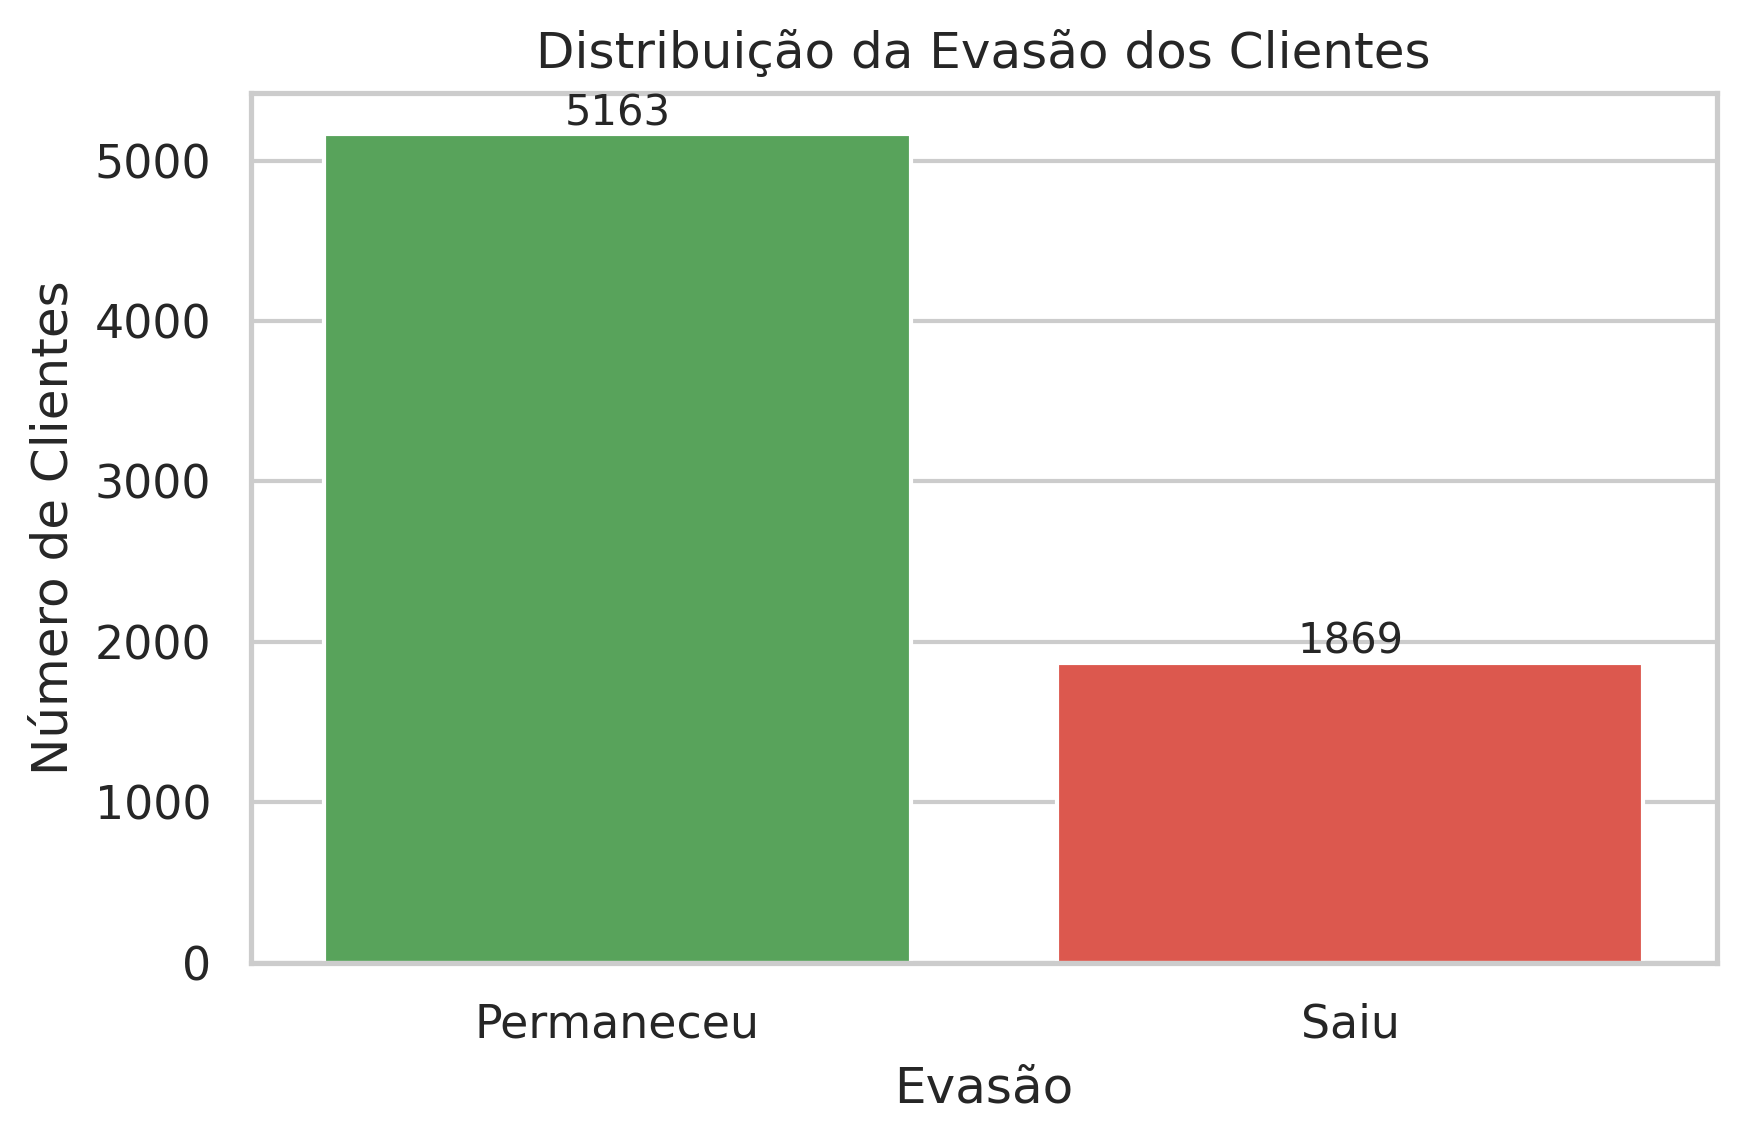

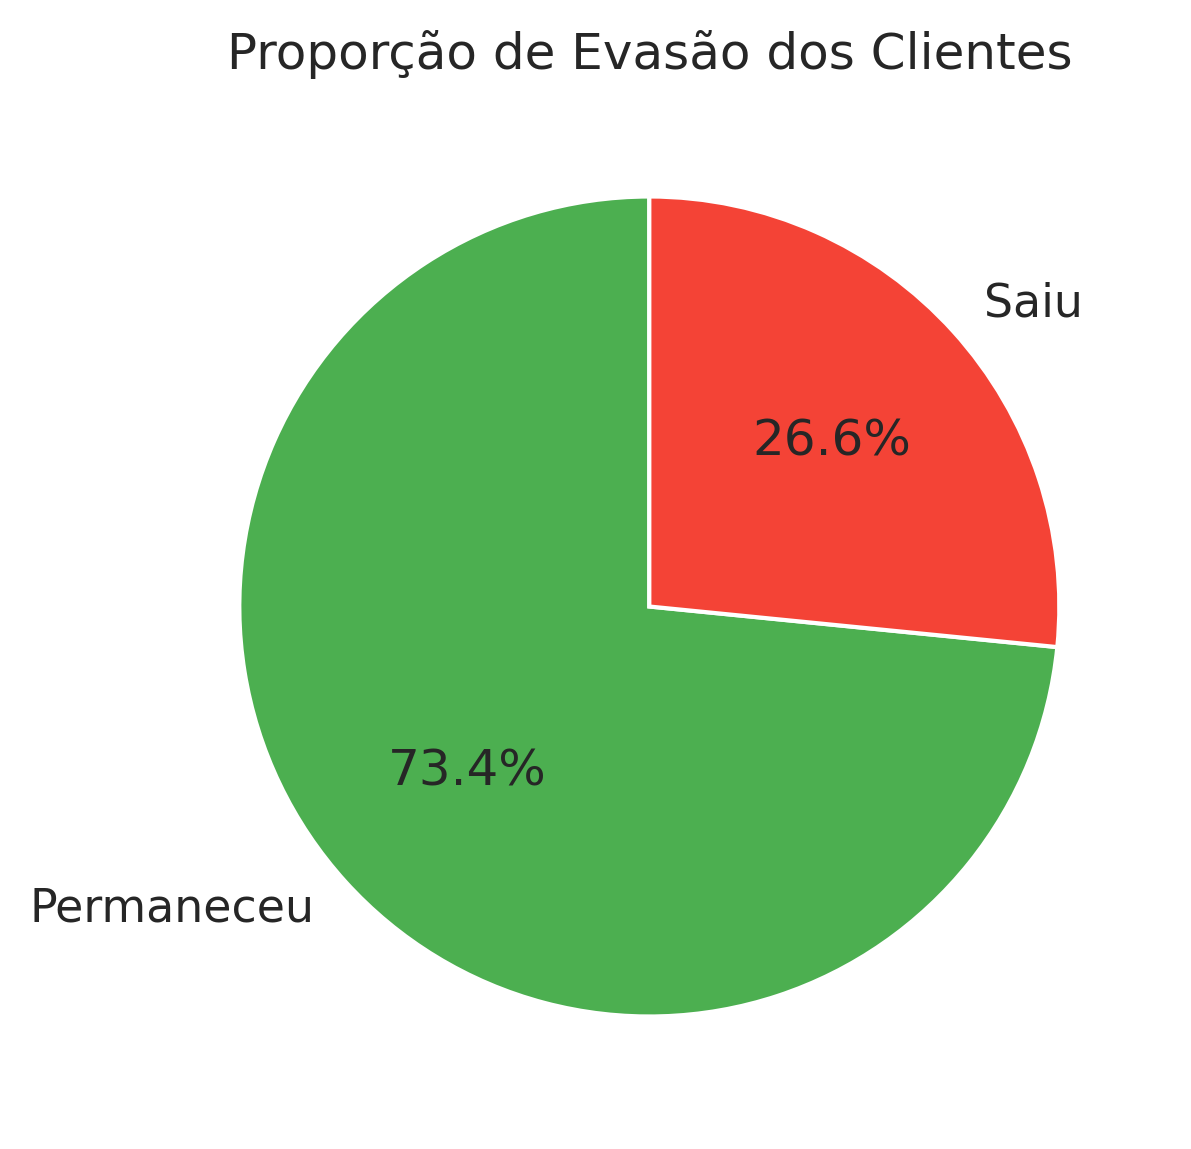

A distribuição de clientes mostra 5.163 permanecendo ativos e 1.869 que cancelaram seus contratos (26,6% de evasão).

A taxa não é desprezível e reforça a necessidade de ações preventivas e monitoramento constante para conter perdas de receita recorrente.

3.   **Relação com Variáveis Numéricas**

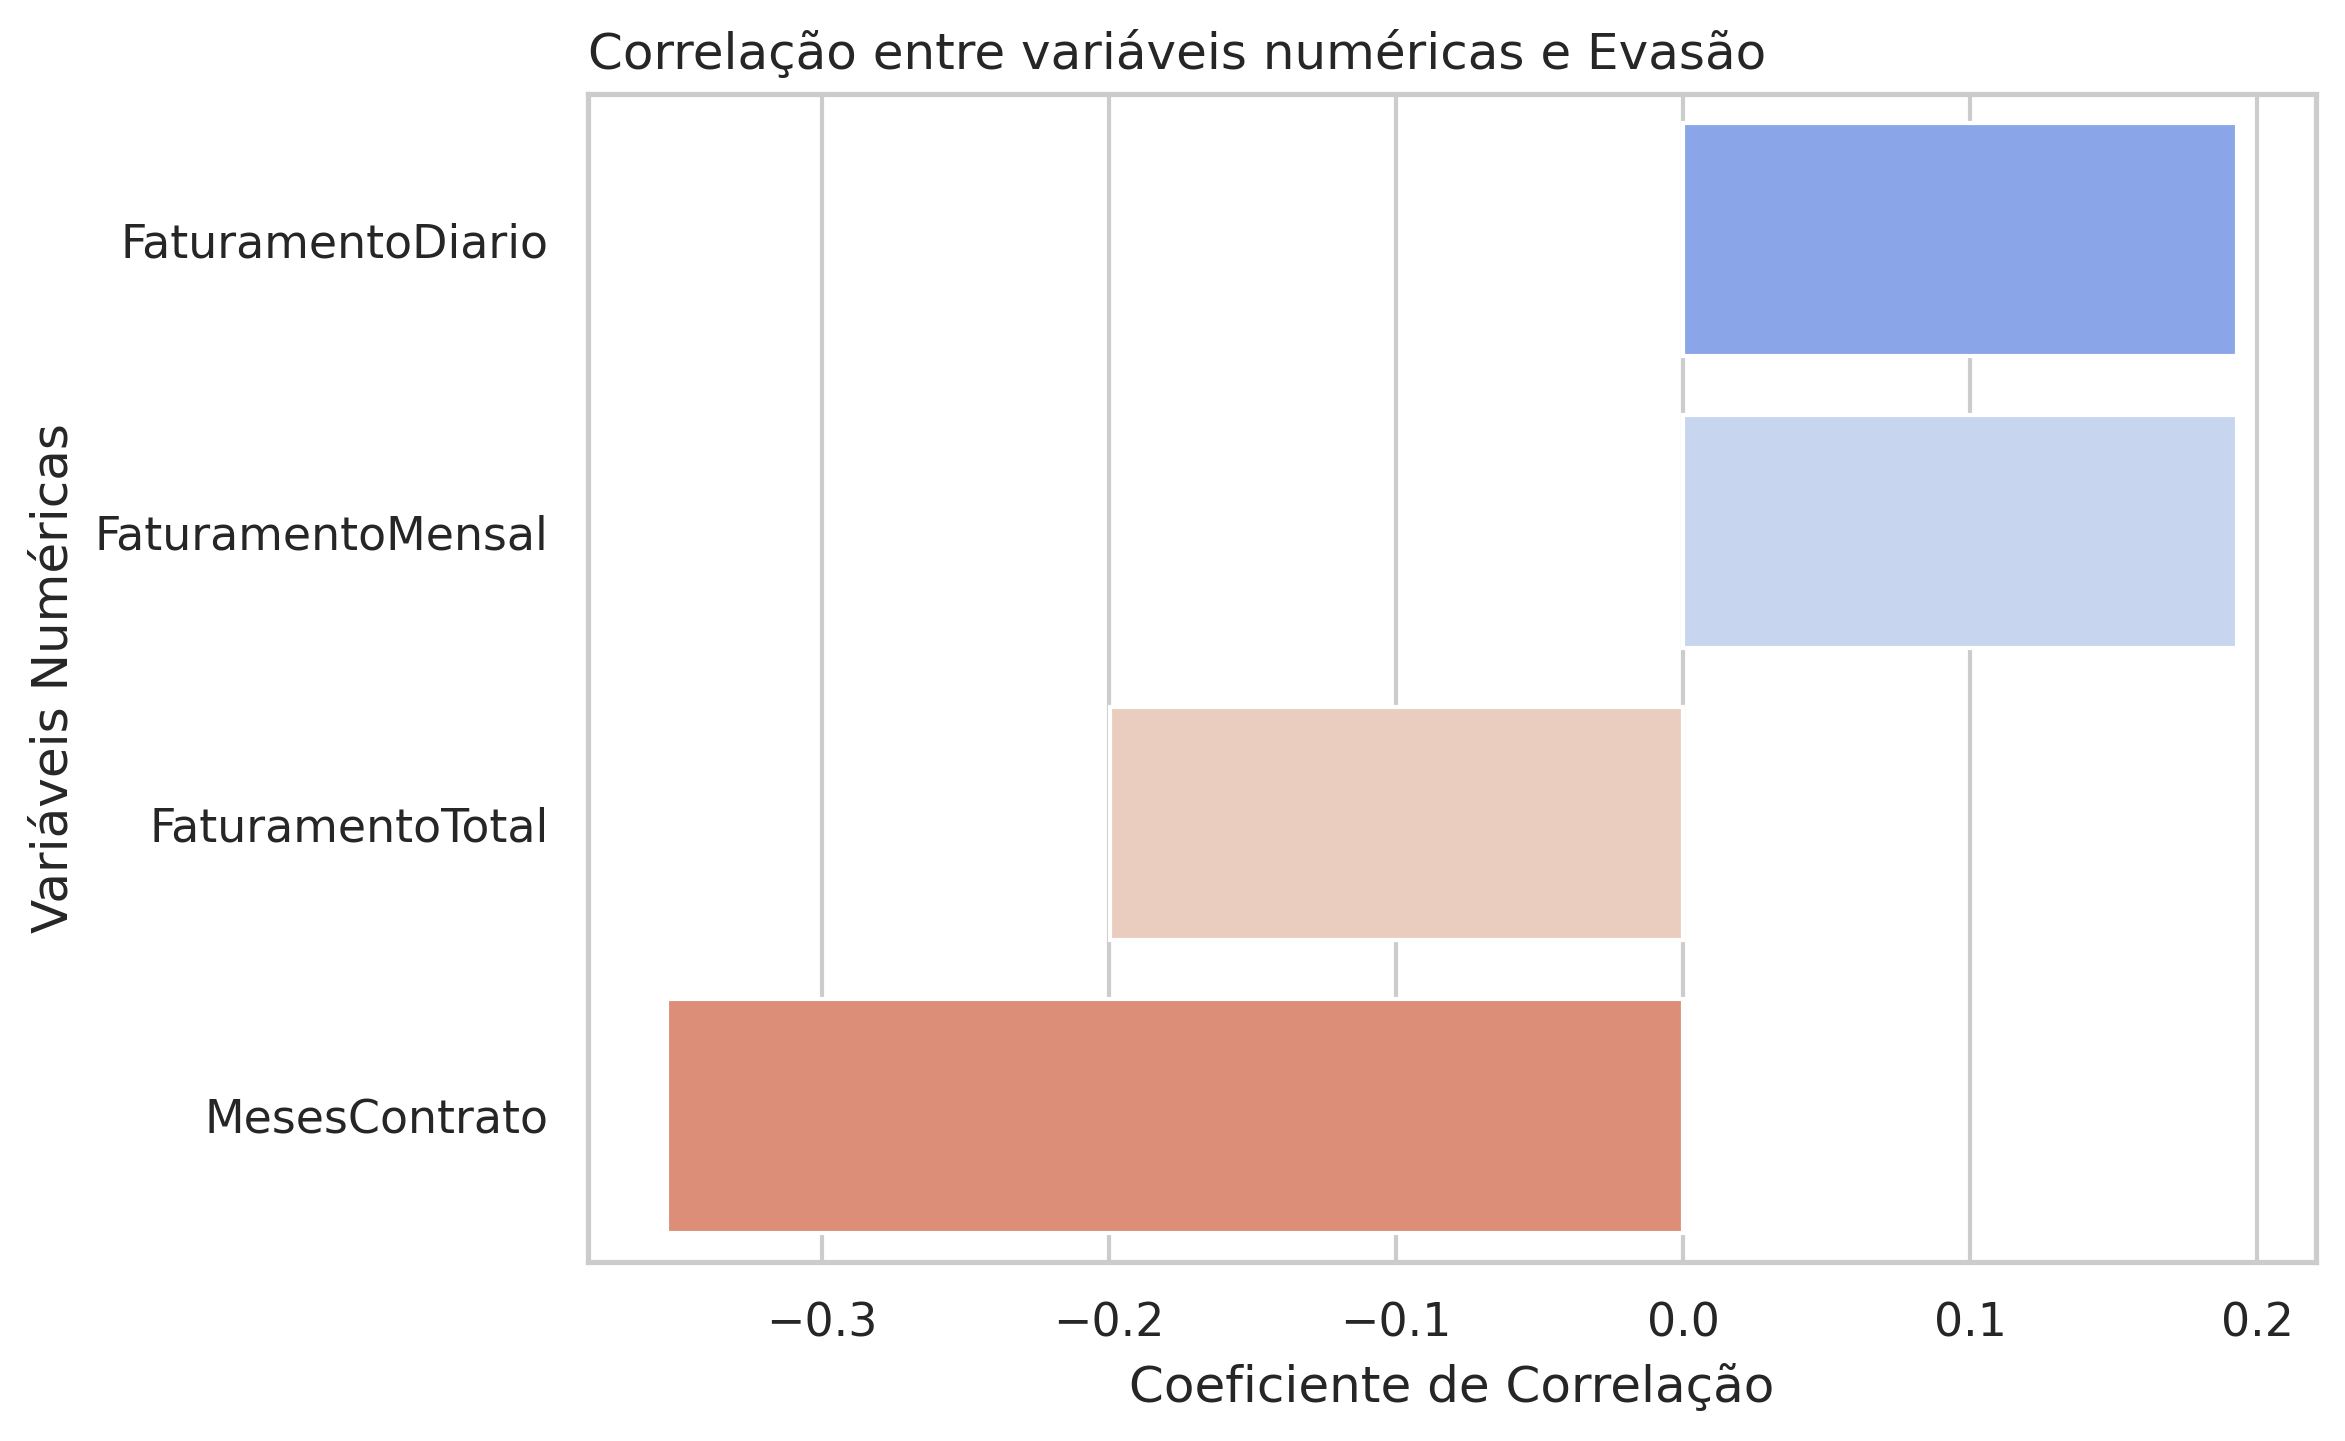

O gráfico acima mostra o coeficiente de correlação entre variáveis numéricas, que pode variar de -1 (correlação negativa perfeita) a +1 (correlação positiva perfeita).

*  Meses Contrato: Relação negativa com evasão — quanto mais tempo de contrato, menor a probabilidade de saída.
*  Faturamento Total: Clientes que geraram mais receita total tendem a permanecer.
*  Faturamento Mensal e Diário: Correlacionam-se positivamente com evasão, sugerindo que planos mais caros podem gerar percepção de custo elevado.

4.   **Influência das Variáveis Categóricas**

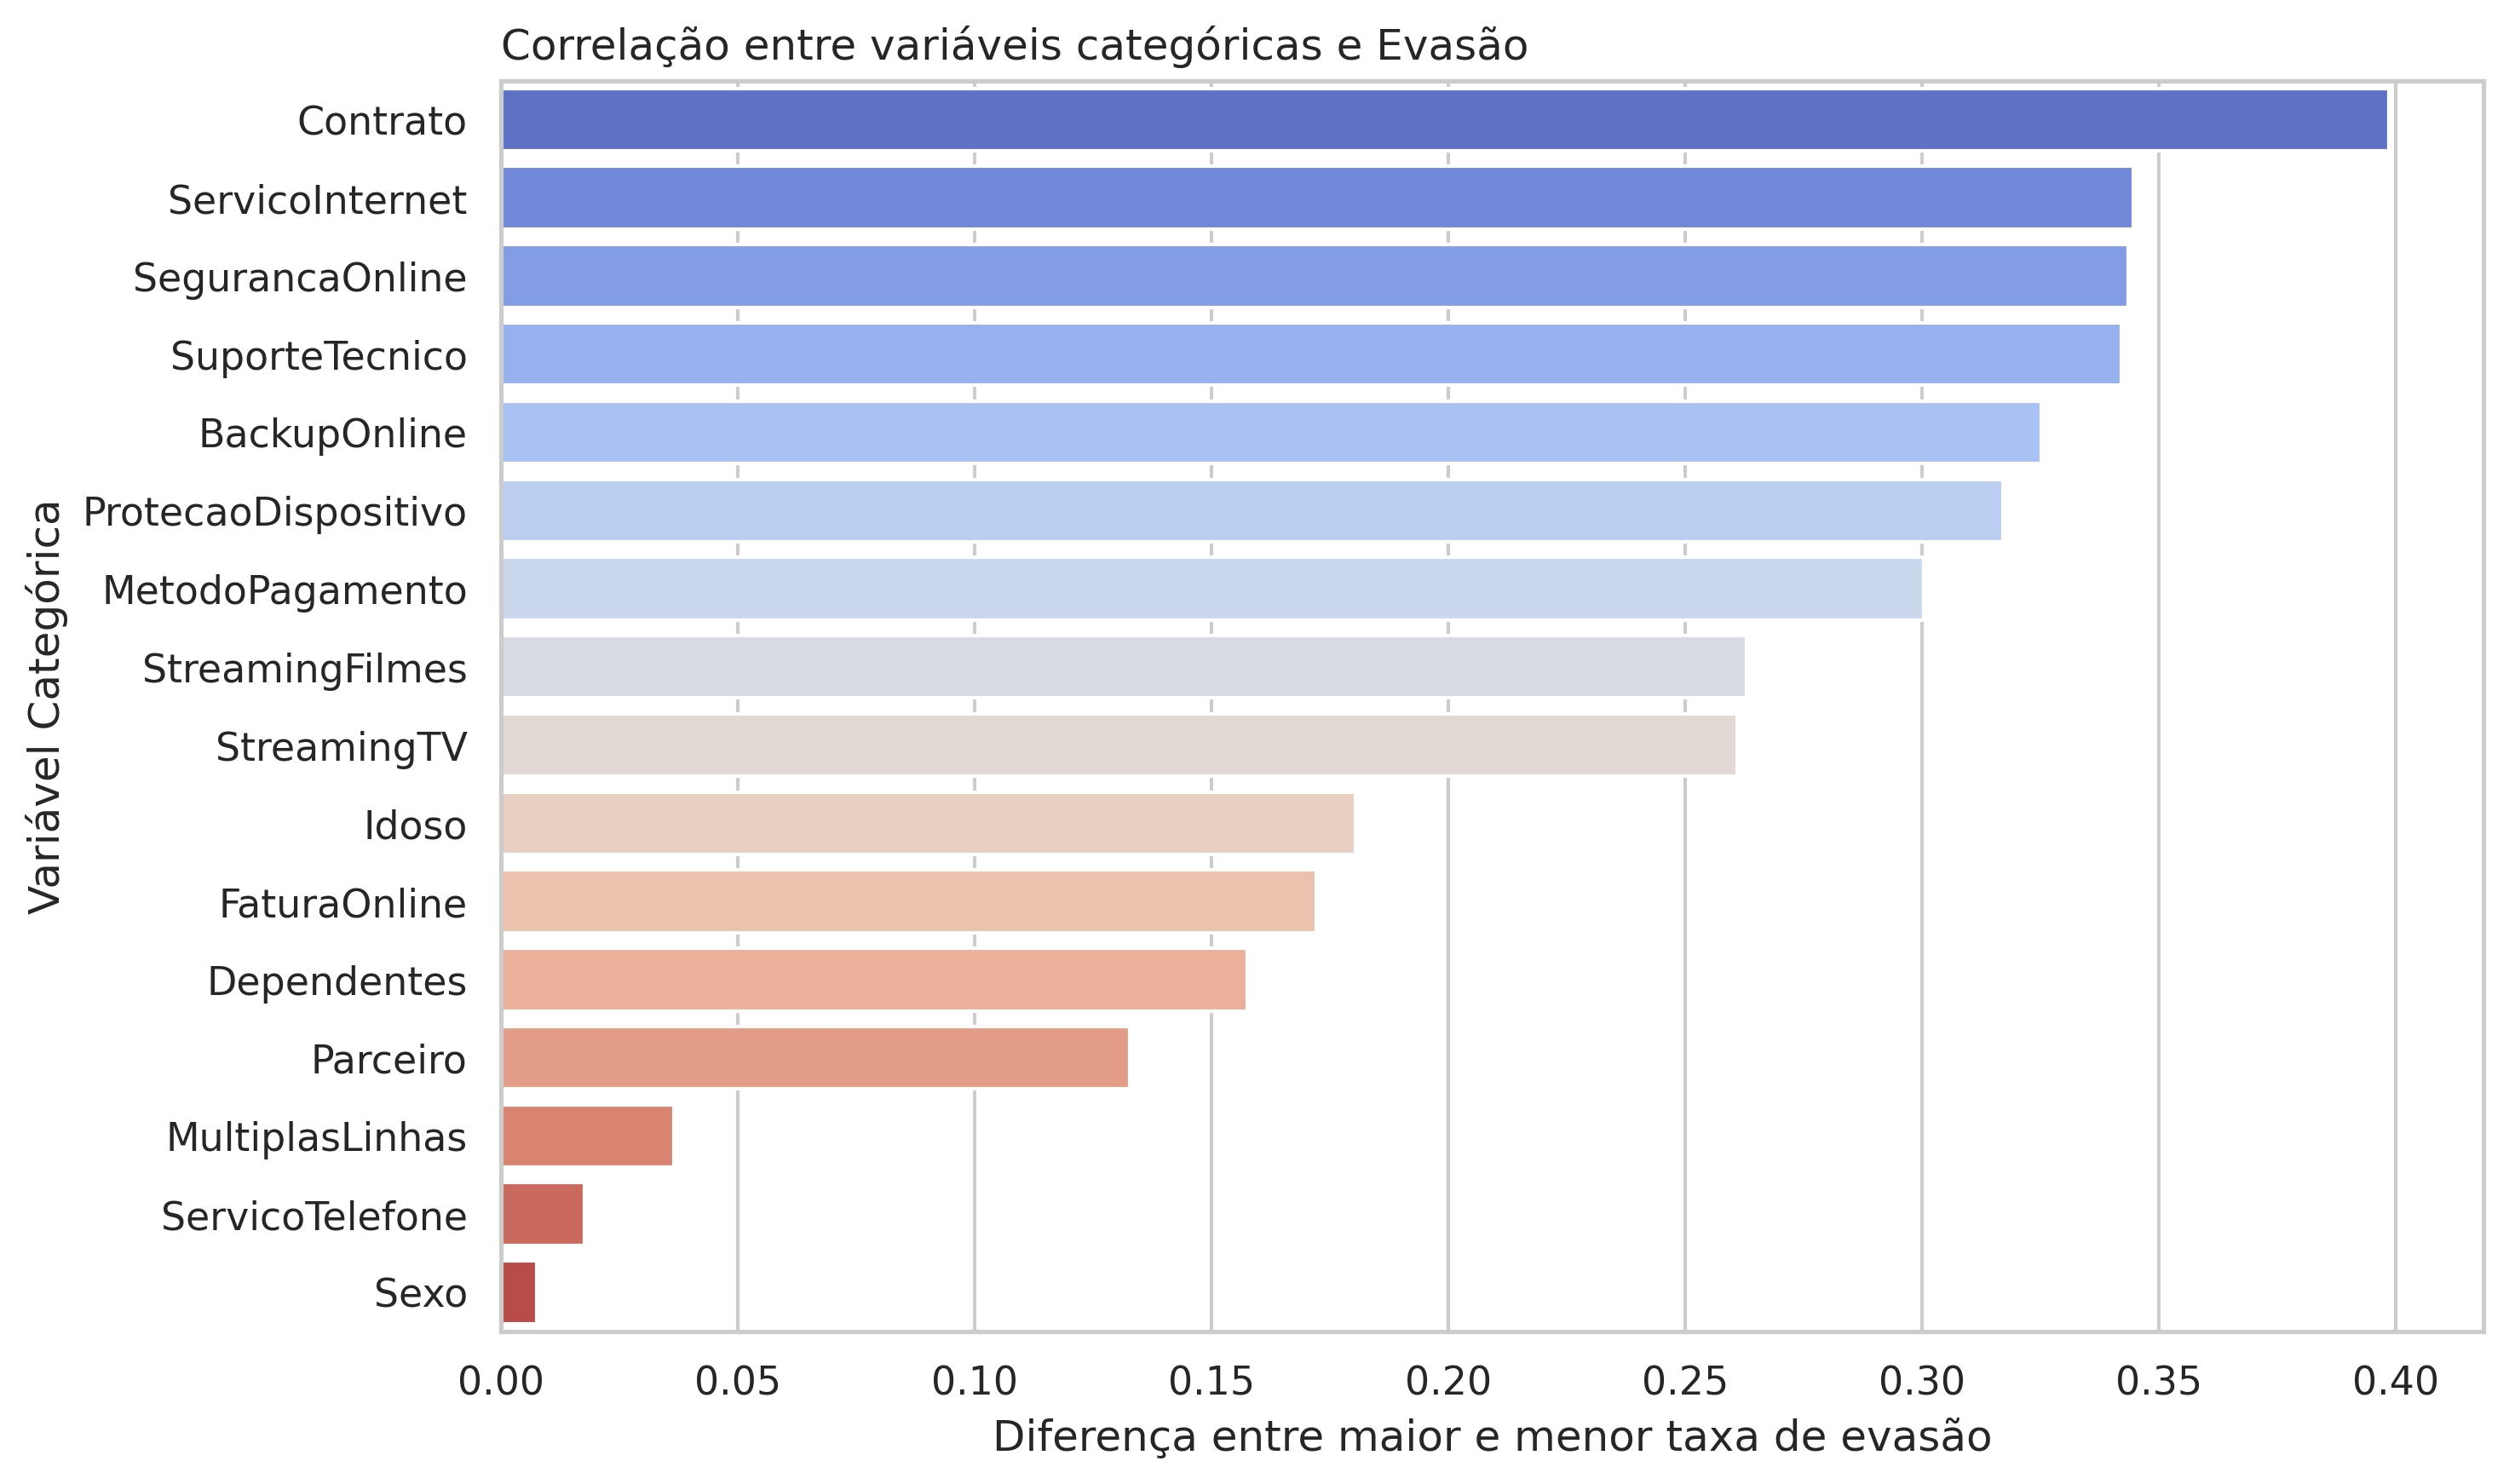

Quanto maior a diferença entre as maiores e menores taxas de evasão, mais relevante é a variável na distinção entre clientes que evadem e os que permanecem.

A análise mostra que:
* Contrato: Clientes com contrato mensal apresentam significativamente maior evasão.
* Tipo de Internet: Clientes com fibra óptica têm maior propensão à evasão; pode refletir expectativas mais altas ou insatisfação com a qualidade/preço.
* Serviços adicionais (Segurança Online, Suporte Técnico, Backup Online, Proteção de Dispositivo): Associados a menor evasão e sugerem maior engajamento.
* Método de Pagamento: Formas mais modernas (eletrônicas) estão relacionadas a maior evasão, podendo indicar facilidade de cancelamento ou perfil menos fidelizado.

# **4- Conclusões e Insights:**

**Perfil dos Clientes que Evadem**

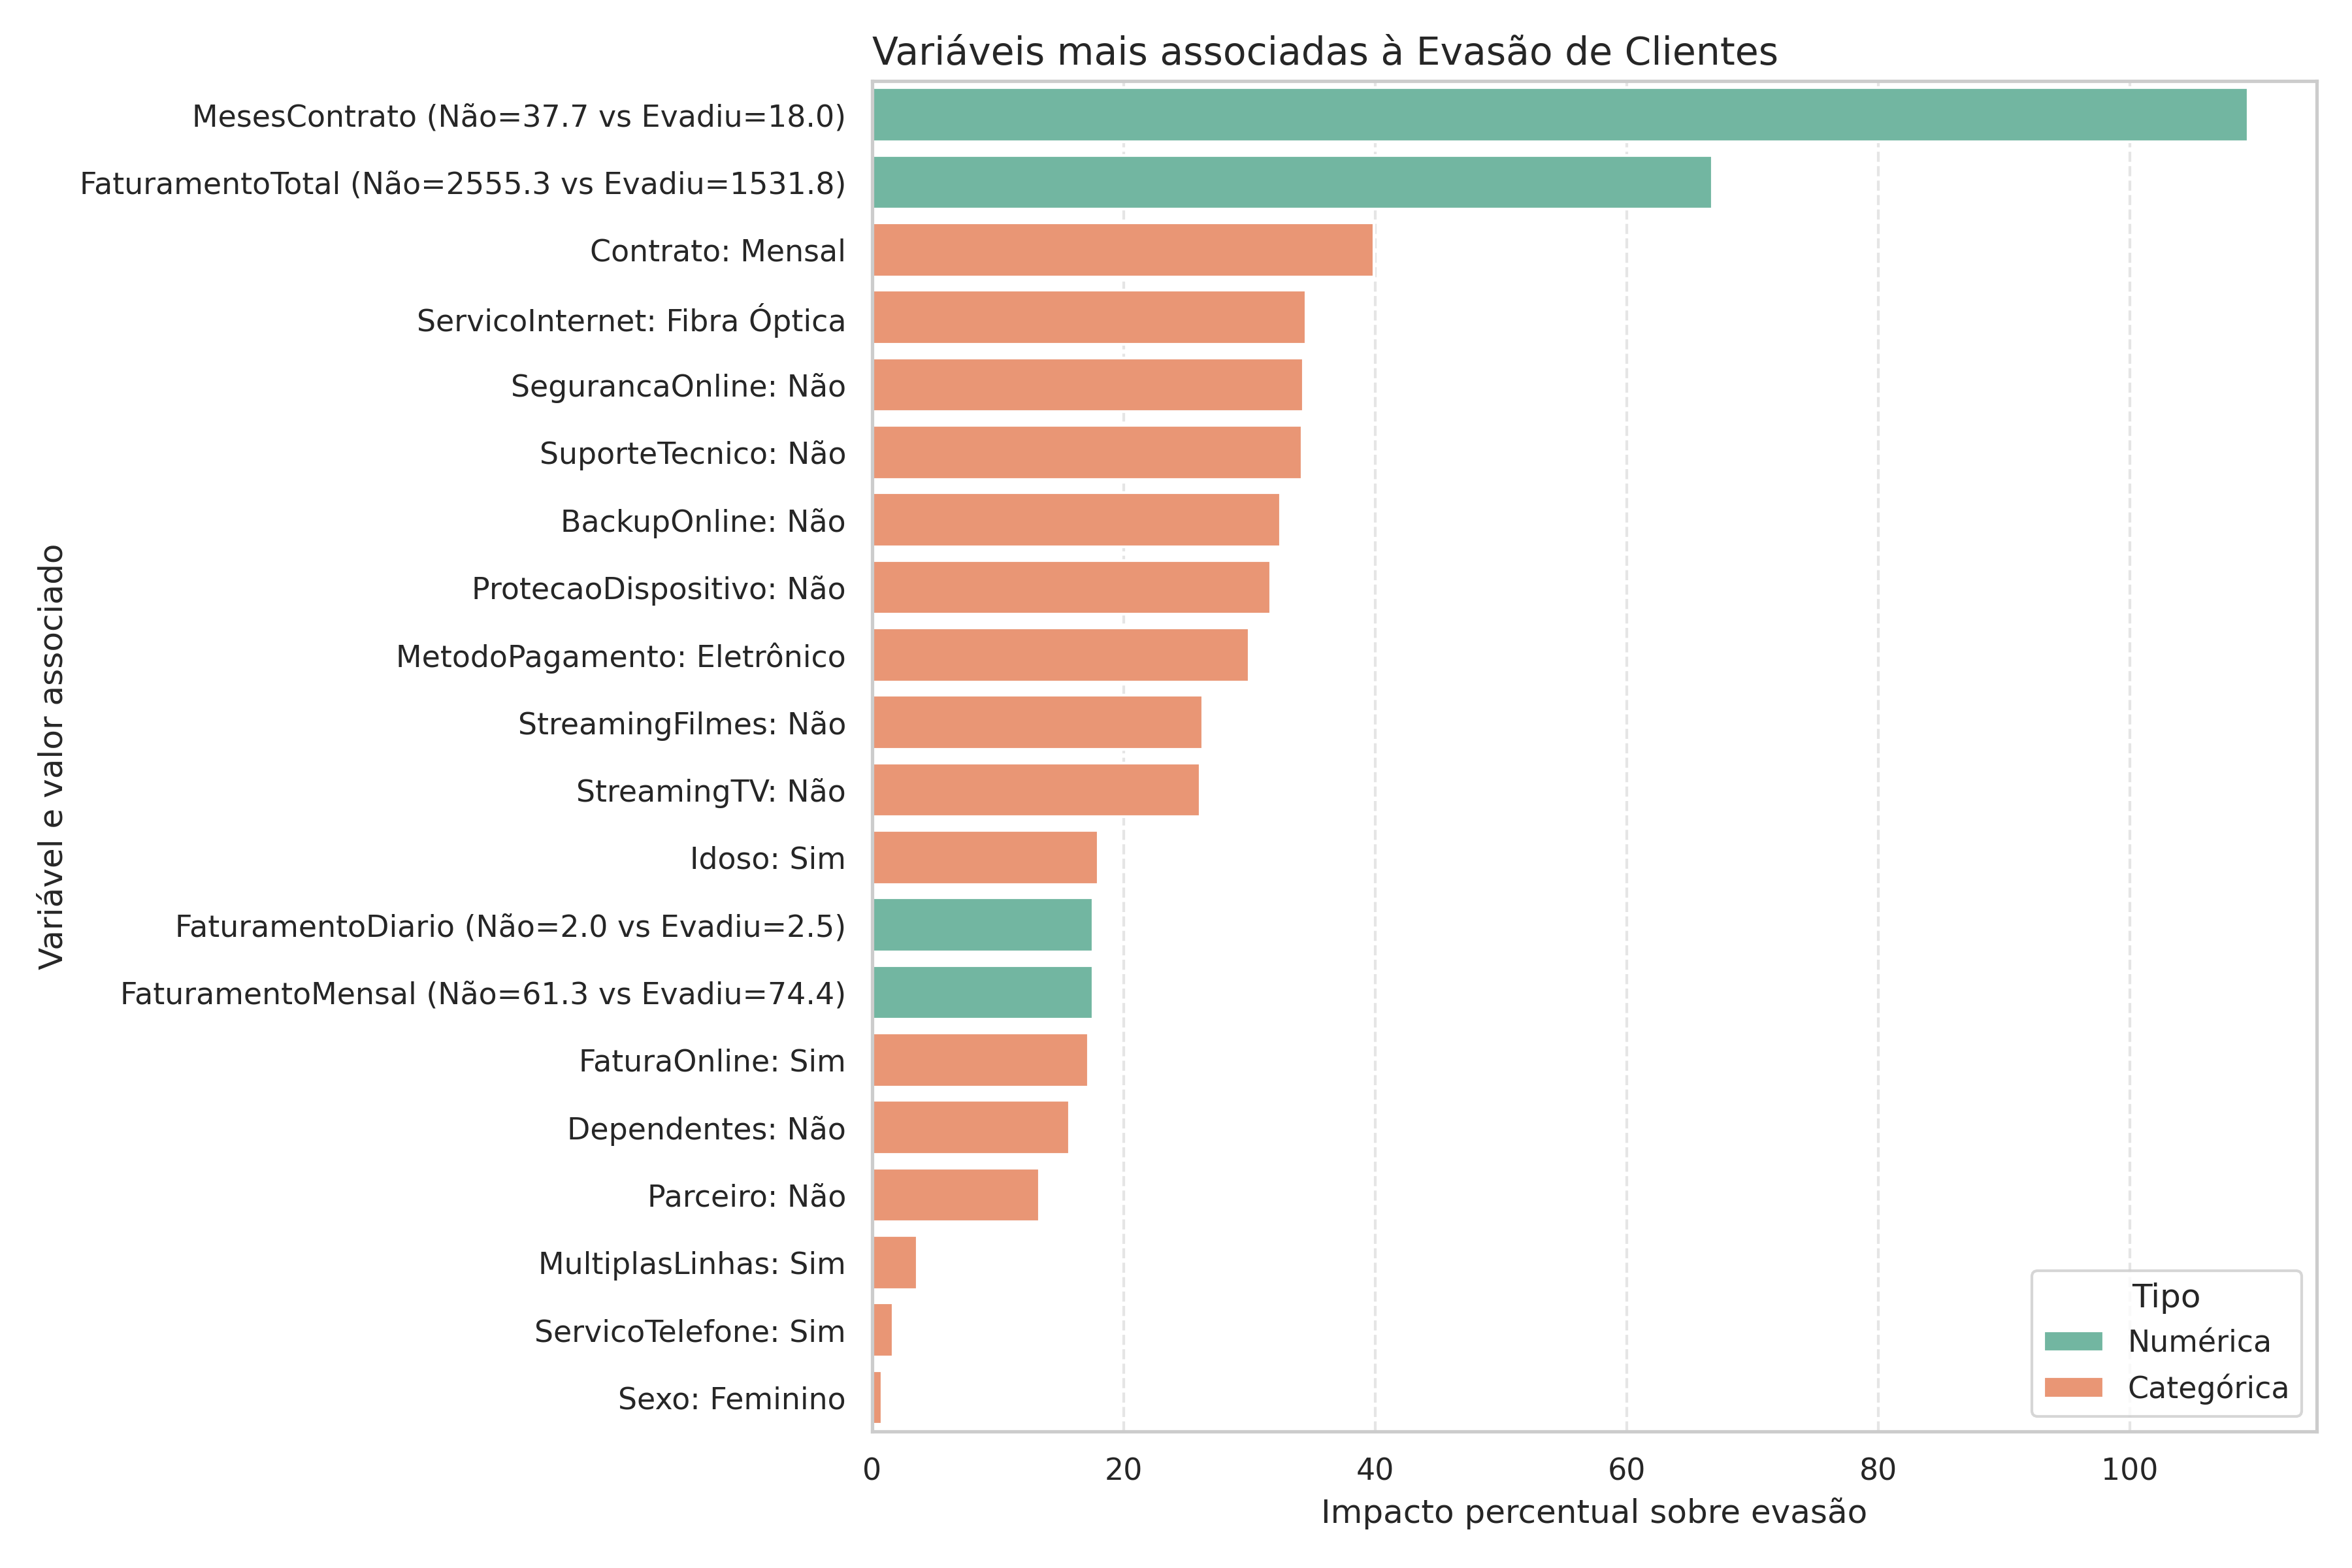

Análise das variáveis com maior impacto percentual na evasão:

* Variáveis numéricas:
    * Meses de Contrato: Média de 37,7 entre os que permanecem vs. 18,0 entre os que evadiram.
    * Faturamento Total: Consideravelmente maior entre os clientes fiéis, indicando maior valor de vida útil.

* Variáveis categóricas:
    * Tipo de contrato: O plano mensal é o mais associado à evasão.
    * Serviços adicionais: A ausência de internet por fibra, segurança, suporte, backup e proteção está fortemente ligada à saída.
    * Pagamento eletrônico: Sugere perfil mais digitalizado e menos fiel.
    * Serviços de streaming: A ausência desses serviços está associada à evasão — indicam valor agregado.

* Perfil demográfico: Idosos e mulheres têm leve propensão maior à evasão, mas com menor impacto comparativo.

A evasão não está vinculada a um único fator, mas sim a um conjunto de elementos que refletem percepção de valor, engajamento e tipo de contrato. Estratégias eficazes de retenção devem incluir:

* Estímulo a contratos mais longos;
* Oferta de pacotes mais completos;
* Foco em clientes com perfil de risco elevado.

**Perfil dos Clientes que Permanecem**

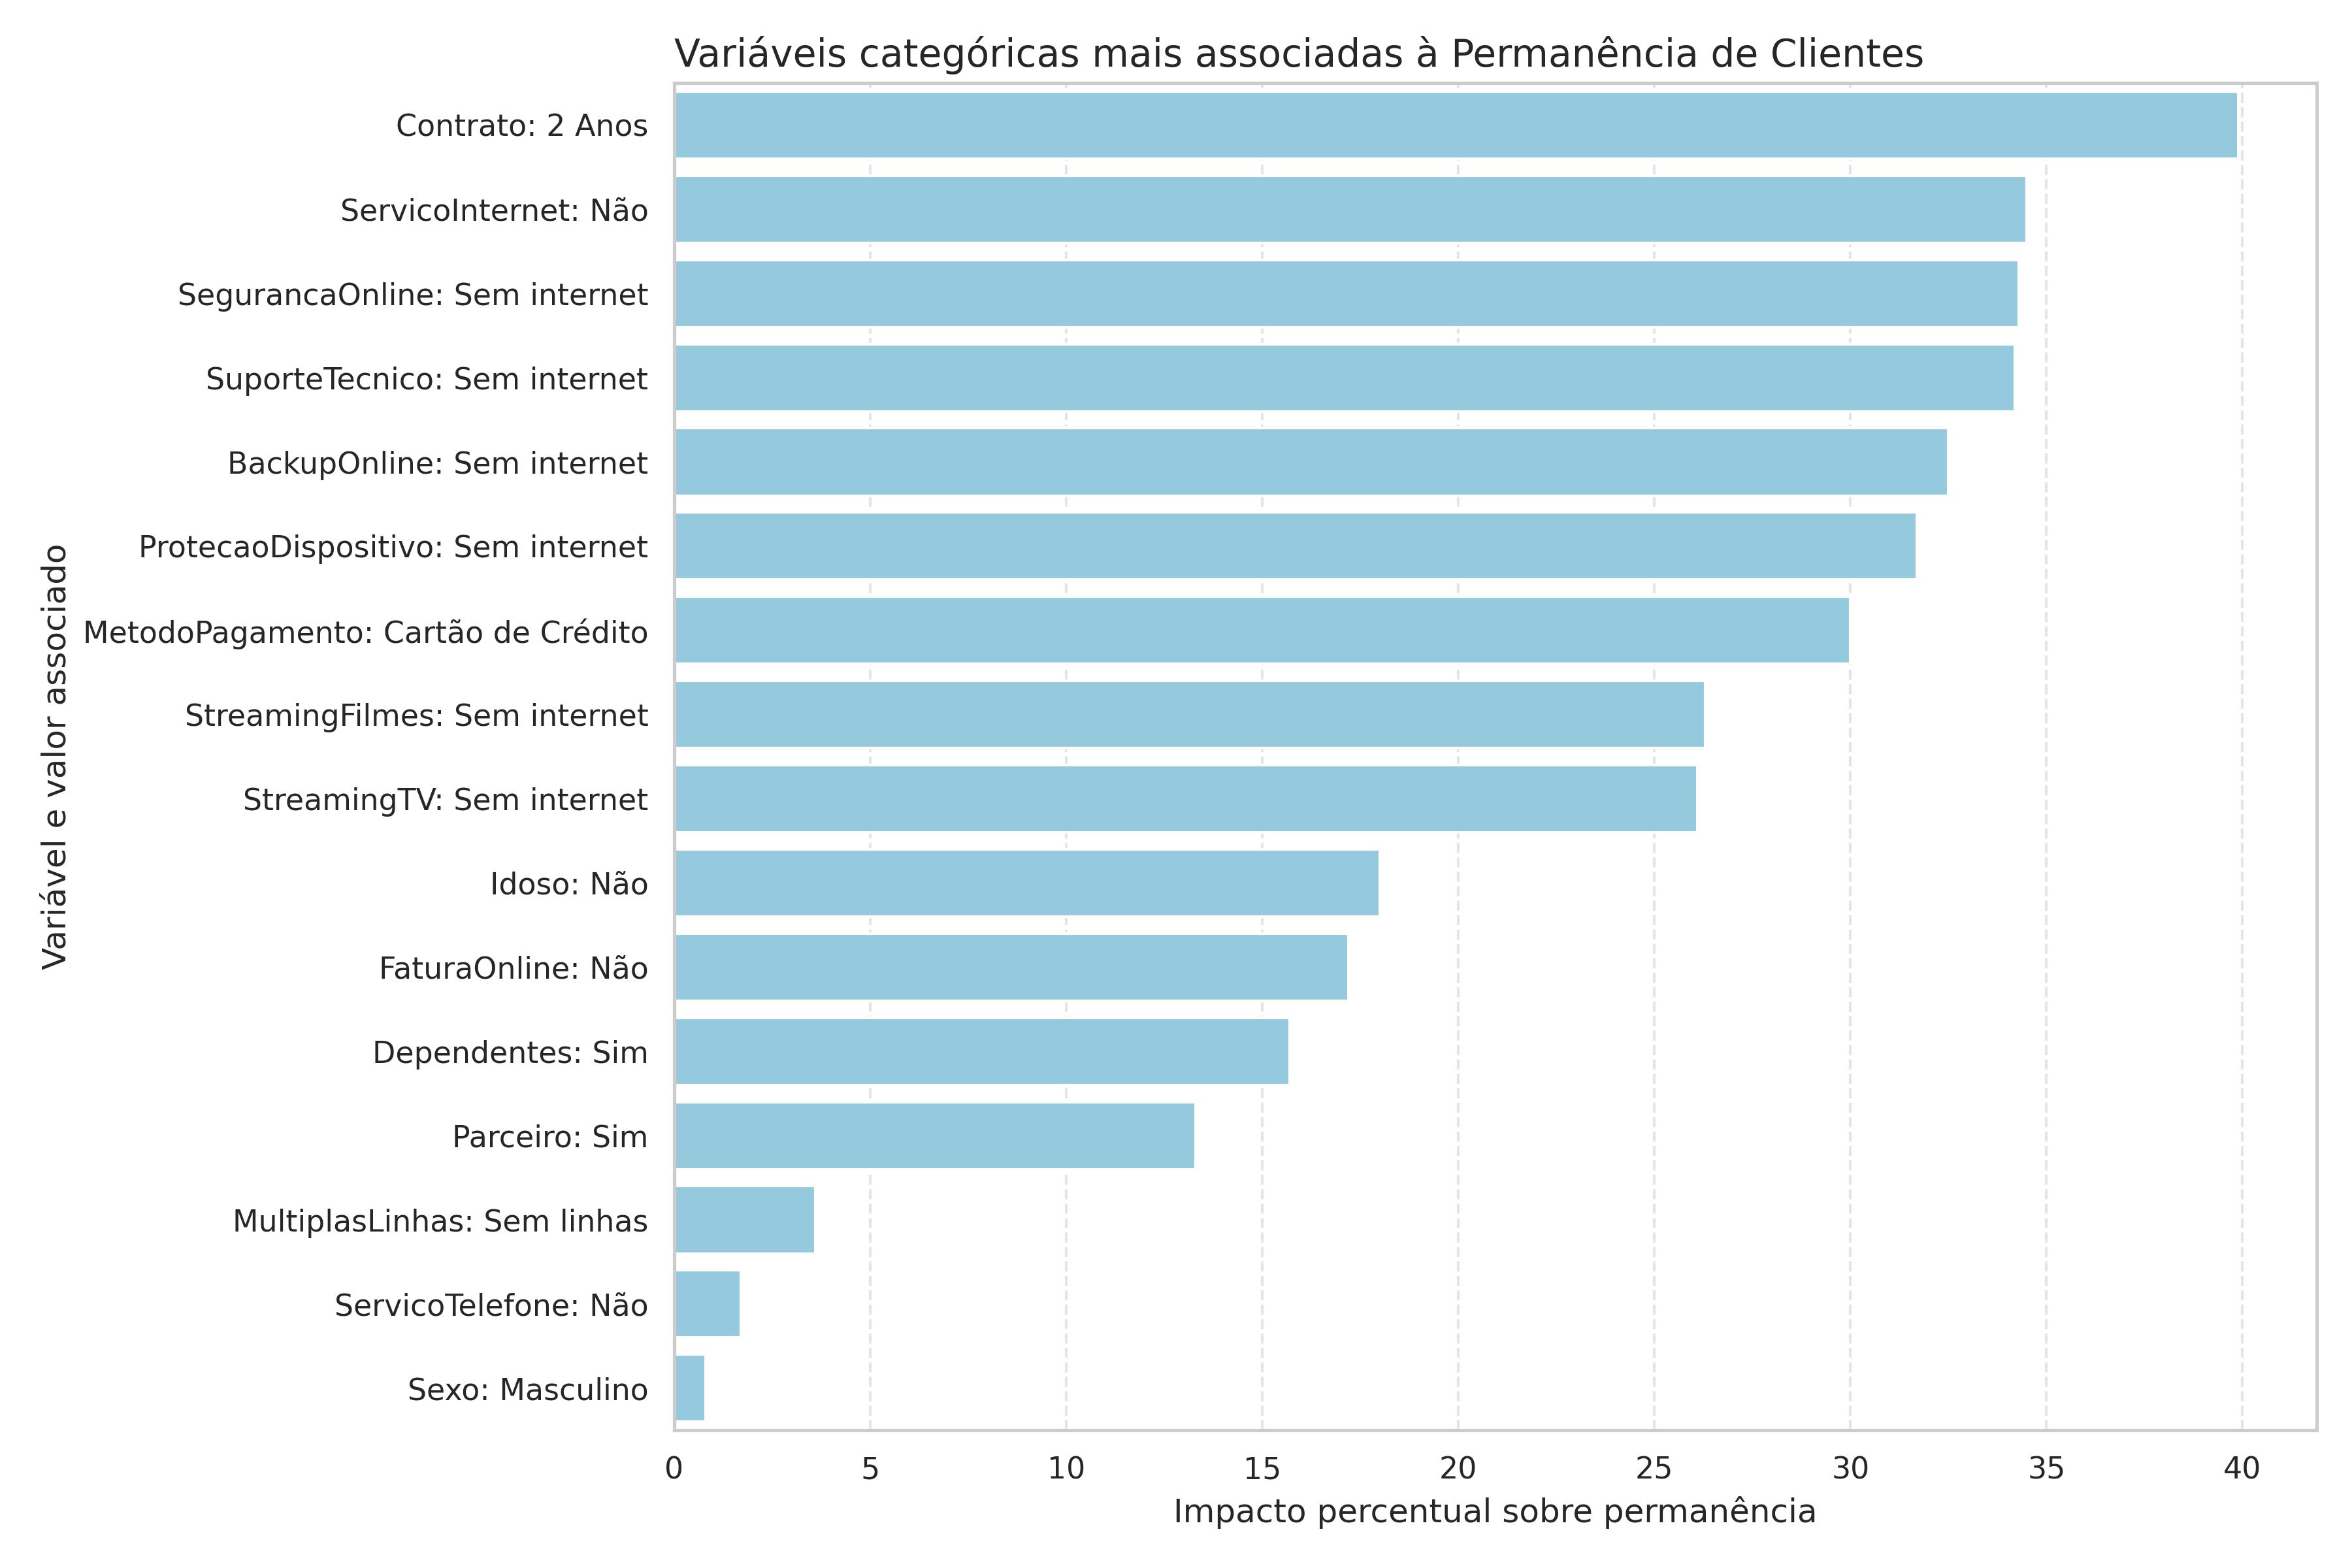

Clientes que permanecem:
* Mantêm contratos de longa duração;
* Utilizam múltiplos serviços;
* Mostram maior engajamento.

Essa constatação confirma a eficácia de programas de fidelização e da atenção especial nos primeiros meses de relacionamento.

# **5- Recomendações:**

1. Incentivar contratos de longa duração

Clientes com contratos de 2 anos apresentam maior taxa de permanência, enquanto planos mensais estão fortemente associados à evasão. Oferecer incentivos para migração de mensal para anual/bienal é estratégico.

2. Oferecer pacotes mais completos com serviços agregados

A ausência de serviços como fibra óptica, suporte técnico, segurança online, backup e proteção de dispositivos está fortemente associada à evasão. Incentivar a contratação desses serviços reduz o risco de saída.

3. Valorizar métodos de pagamento mais estáveis

Pagamento com cartão de crédito está associado à permanência. Já meios eletrônicos aparecem com maior evasão, possivelmente por refletirem um perfil mais volátil ou digitalmente ágil.

4. Atenção especial a clientes idosos e do sexo feminino

Esses grupos mostram maior propensão à evasão. Programas personalizados de relacionamento e suporte podem ajudar a reduzir essa tendência.

5. Monitorar e ajustar a percepção de custo

Clientes que evadiram apresentavam faturas mensais e diárias mais altas. Avaliar o valor percebido em relação ao preço cobrado é fundamental. Pode-se oferecer descontos progressivos, bônus por fidelidade ou justificar melhor os diferenciais do serviço.

6. Reforçar o relacionamento nos primeiros meses de contrato

Clientes que evadiram tinham, em média, metade do tempo de contrato dos que permaneceram. Investir em ações de engajamento logo após a adesão pode prevenir cancelamentos precoces.

7. Agregar serviços de entretenimento (Streaming TV e Filmes)

A ausência desses serviços aparece entre os fatores associados à evasão. Incluí-los em planos-padrão ou oferecê-los como bônus pode elevar o valor percebido.
